<a href="https://colab.research.google.com/github/thanhtruong1712/DAMH_KHDLUD/blob/main/Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Báo cáo đồ án môn "Khoa học dữ liệu ứng dụng"**

Nhóm 7:
1. 1712770 - Trương Thị Lệ Thanh - thanhtruong1712
2. 1712771 - Bùi Thái Tấn Thành - thanhtan0501
3. 1712778 - Thống A Thảo - thaothong21

Link thùng chứa Github của nhóm:[tại đây](https://github.com/thanhtruong1712/DAMH_KHDLUD)

## **Mô tả bài toán**

## Giới thiệu bài toán

* **Tên cuộc thi**: [University of Liverpool - Ion Switching](https://www.kaggle.com/c/liverpool-ion-switching)
* **Mô tả**: 
  - Cuộc thi được diễn ra vào 25/2/2020 và kết thúc vào 26/5/2020 với tổng giải thưởng $25.000 với sự hợp tác của Đại học Liverpool. Trong cuộc thi này, chúng ta được cung cấp các tín hiệu điện tương ứng với dữ liệu kênh ion, và mục tiêu là tạo ra một thuật toán có thể tự động xác định số lượng kênh được mở tại mỗi thời điểm.
  - Kênh ion là các màng protein tạo lỗ có ở động vật và thực vật cho phép các ion đi qua lỗ kênh. Chúng mã hóa khả năng học tập và trí nhớ giúp chống lại nguy cơ nhiễm trùng và kích thích co cơ. Các kênh ion tạo ra dữ liệu chức năng dưới dạng dòng điện, và được ghi lại thông qua kỹ thuật "kẹp ráp nối" (Patch clamp electrophysiology). Các kênh ion điều chỉnh một loạt các quá trình sinh lý bao gồm truyền tín hiệu điện nhanh chóng, tiết chất lỏng, hormone và chất dẫn truyền, và tăng sinh. Do đó, các kênh ion là mục tiêu tấn công phổ biến của các loại vi khuẩn cũng như để nghiên cứu ra các phương pháp điều trị. Có 3 trạng thái hoạt động của các kênh ion: ĐÓNG - MỞ - BẤT HOẠT. Sự đóng-mở của những kênh ion này qua màng sợi trục tạo ra những điện thế động xuyên màng, giúp truyền thông tin cũng như điều hoà chức năng tế bào. Quá trình khử cực và siêu phân cực xảy ra khi các kênh ion trong màng mở hoặc đóng, làm thay đổi khả năng đi vào hoặc ra khỏi tế bào của các loại ion. Và theo được biết thì mất hoặc rối loạn các kênh ion sẽ gây ra rất nhiều bệnh ở người và động vật, bao gồm cả bệnh về tim mạch, vì vậy sau khi có được bản ghi tín hiệu điện sinh lý nó sẽ được phân tích để suy ra một số đặc tính của bệnh, từ đó giúp ta biết cách ngăn ngừa và điều trị hợp lý.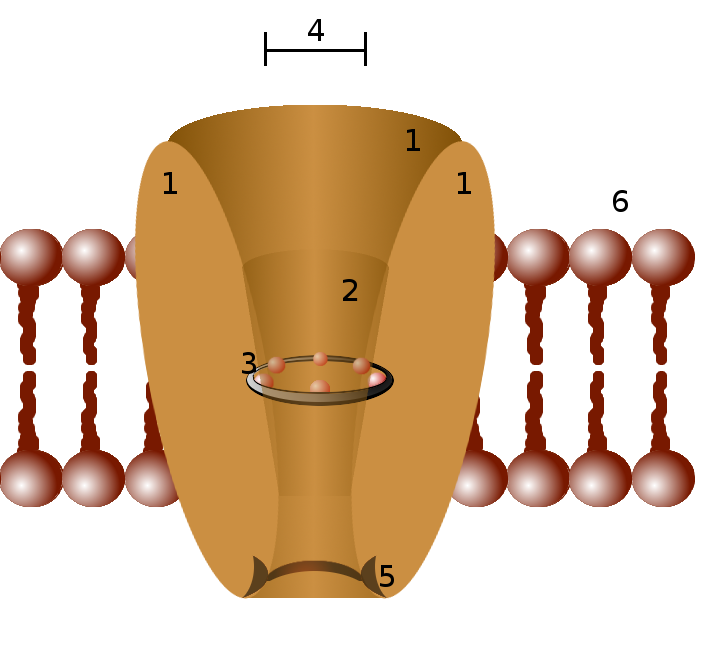
  
  -  Các phương pháp hiện nay để phát hiện những thay đổi trạng thái này rất tốn thời gian và tốn nhiều công sức do con người phải luôn giám sát trong quá trình phân tích. Những khó khăn này hạn chế khối lượng phân tích dòng kênh ion có thể được sử dụng trong nghiên cứu. Do vậy, các nhà khoa học hy vọng rằng công nghệ có thể cho phép phát hiện tự động nhanh chóng các sự kiện thay đổi trạng thái của kênh ion trong dữ liệu cho trước.
* **Input**: Tập dữ liệu tín hiệu điện sinh lý được cung cấp từ Viện Lão hóa và Bệnh mãn tính của Đại học Liverpool.
* **Output**: Dự đoán số lượng kênh ion được mở tại mỗi thời điểm.
* **Độ đo**: Mục tiêu của cuộc thi này là tối ưu hóa điểm số F1 trên tổng số dòng của tập test. Điểm F1 được định nghĩa là trung bình điều hòa (harmonic mean) giữa precision và recall.
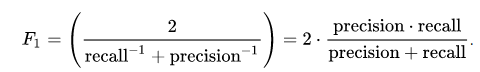

trong đó:
  - Precision được định nghĩa là tỉ lệ số điểm true positive trong số những điểm được phân loại là positive (TP + FP).
  - Recall được định nghĩa là tỉ lệ số điểm true positive trong số những điểm thực sự là positive (TP + FN).
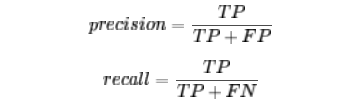



## Mô tả dữ liệu:
  - Dữ liệu được cung cấp gồm 3 Files:
* **train.csv**: Chứa các giá trị tín hiệu điện sinh lý và số lượng kênh ion được mở ở các mốc thời gian. Gồm 5 triệu dòng chứa bộ 3 dữ liệu sau:
        - times: mốc thời gian được ghi lại
        - signal: giá trị tín hiệu điện(ampere) cho mỗi mốc thời gian, các giá trị này được đo ở tần số lấy mẫu là 10 kHz
        - open_channels: số kênh mở tương ứng tại mốc thời gian đó(chỉ được cung cấp cho tập train)
* **test.csv**: Chứa các giá trị tín hiệu điện sinh lý được đo ở các mốc thời gian. Gồm 2 triệu dòng và chỉ chứa mỗi 2 cột dữ liệu times và signal.
* **sample_submission.csv**: Gồm 2 cột, lần lượt là các mốc thời gian trong tập test và kết quả số kênh ion được mở mà chúng ta sẽ dự đoán.
<br>

## **Giải quyết bài toán**

### 1. Ý tưởng: 
* Trong đồ án này, nhóm tìm hiểu và cài đặt lại phương pháp đứng thứ [3](https://github.com/GillesVandewiele/Liverpool-Ion-Switching) trên private leaderboard cho bài toán University of Liverpool - Ion Switching.
* Bài toán này là một bài toán phân lớp. Với 11 lớp có giá trị từ 0 đến 10. Và dựa vào tập train mà có tưởng cho việc phân loại category từ đó áp dụng mô hình phù hợp.
* Tóm tắt các bước thực hiện của tác giả:
  - Căn chỉnh tín hiệu và các kênh bằng hồi quy tuyến tính giúp việc phân tích dữ liệu sau này trở nên đơn giản hơn. (tiền xử lí dữ liệu).
  - Lọc nhiễu trong tín hiệu điện sinh lý.( tiền xử lí dữ liệu). Vì mạng cung cấp điện có tần số 50Hz có mặt khắp nơi trong bệnh viện, phòng khám do đó lưới điện có thể tác động lên các thiết bị ghi tín hiệu. Nếu tiến hành đo tín hiệu điện ở những nơi có từ trường mạnh của mạng cung cấp điện nhiễu 50Hz sẽ làm ảnh hưởng đến chất lượng ghi tín hiệu.
  - Áp dụng mô hình Markov ẩn. (Dự đoán open_channel).
  - Mở rộng mô hình Markov ẩn
  - Hậu xử lý dữ liệu.

### 2. Nội dung thực hiện




#### Import thư viện

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

#### Download các file data

In [ ]:
!gdown --id 107rl-tH1_Ynm0MKS-hH-LS0GEee7c4MX  #tải file train_clean.csv
!gdown --id 1dF_Ej9-fsF-VkUTV_5Geb__emOsGXB67  #tải file test_clean.csv
!gdown --id 1iWszhD2WfjUzBSqsPFpMD6lsoKNvdQ3H  #tải file train.csv
!gdown --id 1jHnLvPwTCTfaw0wHrXWCUpKAEqbwe-h9  #tải file test.csv
!gdown --id 1GQ0razzM0zG7ylno_NJhieAl_M4vyZGg  #tải file Ys.csv


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=107rl-tH1_Ynm0MKS-hH-LS0GEee7c4MX
To: /content/train_clean.csv
100% 115M/115M [00:01<00:00, 81.5MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dF_Ej9-fsF-VkUTV_5Geb__emOsGXB67
To: /content/test_clean.csv
100% 46.0M/46.0M [00:00<00:00, 84.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From

##### Khám phá dữ liệu

In [ ]:
train12 = pd.read_csv('train.csv')
train12


,time,signal,open_channels
0,0.0001,-2.7600,0
1,0.0002,-2.8557,0
2,0.0003,-2.4074,0
3,0.0004,-3.1404,0
4,0.0005,-3.1525,0
...,...,...,...
4999995,499.9996,2.9194,7
4999996,499.9997,2.6980,7
4999997,499.9998,4.5164,8
4999998,499.9999,5.6397,9


In [ ]:
test12 = pd.read_csv('test.csv')
test12

,time,signal
0,500.0001,-2.6498
1,500.0002,-2.8494
2,500.0003,-2.8600
3,500.0004,-2.4350
4,500.0005,-2.6155
...,...,...
1999995,699.9996,-2.9092
1999996,699.9997,-2.7422
1999997,699.9998,-2.8285
1999998,699.9999,-2.9092


Đầu tiên chúng ta xem xét các dữ liệu ở tập train và tập test.

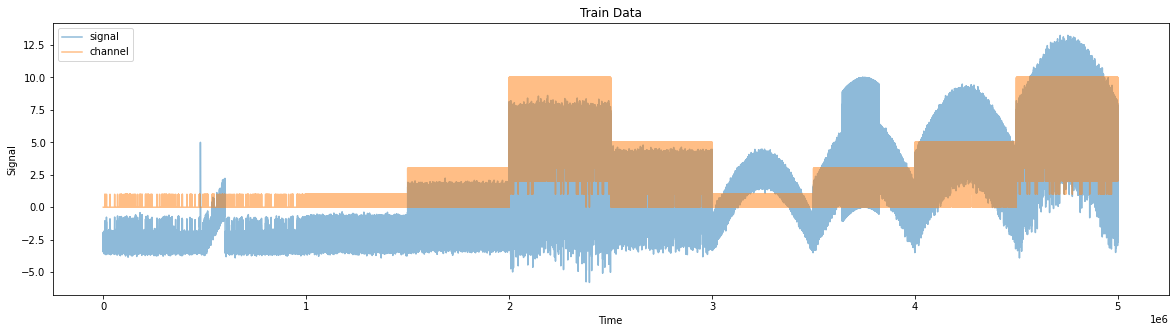

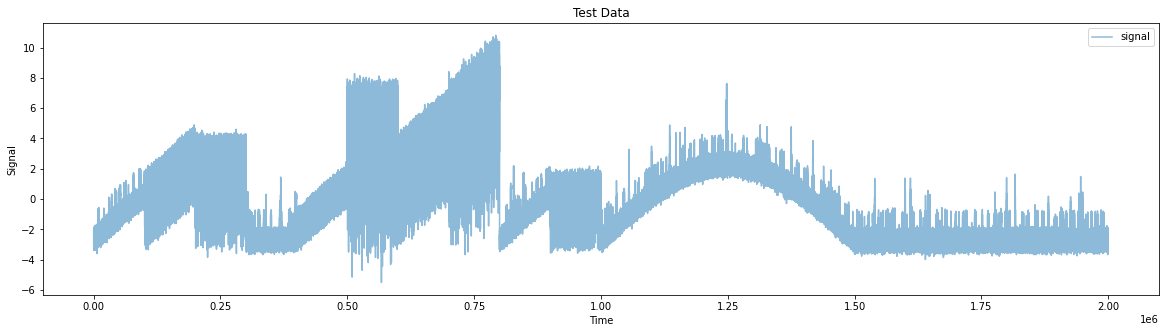

In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]
###
plt.plot(train12['signal'],label='signal', alpha=0.5);
plt.plot(train12['open_channels'], label="channel", alpha=0.5);
plt.legend();
plt.ylabel('Signal');
plt.xlabel('Time');
plt.title('Train Data');
plt.show()
plt.plot(test12['signal'],label='signal', alpha=0.5)
plt.legend();
plt.ylabel('Signal');
plt.xlabel('Time');
plt.title('Test Data');
plt.show()

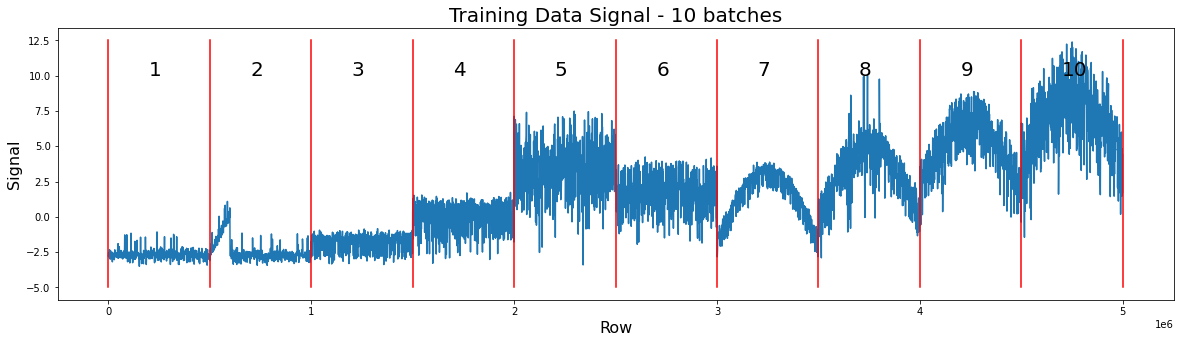

In [ ]:
plt.figure(figsize=(20,5)); res = 1000
plt.plot(range(0,train12.shape[0],res),train12.signal[0::res])
for i in range(11): plt.plot([i*500000,i*500000],[-5,12.5],'r')
for j in range(10): plt.text(j*500000+200000,10,str(j+1),size=20)
plt.xlabel('Row',size=16); plt.ylabel('Signal',size=16); 
plt.title('Training Data Signal - 10 batches',size=20)
plt.show()

Bằng cách kiểm tra các kênh mở trong tập huấn luyện nhiều hơn, chúng ta có thể tìm thấy năm nhóm khác nhau trong tập huấn luyện:
- Một nhóm open_channel bằng 0 hoặc 1. Với nhiều kênh 0 và một vài kênh 1 (category 1).
-Một nhóm open_channel bằng 0 hoặc 1. Với nhiều kênh 1, một vài kênh 0 (category 2)
- Một nhóm open_channel bằng 0,1,2,3. (category 3)
- Một nhóm open_channel bằng 0,1,2,3,4,5. (category 4)
- Một nhóm open_channel bằng 0,1,2,3,4,5,6,7,8,9,10. (category 5)
- Và có thêm một nhóm trong rất giống category 1, nhưng có vài điểm đặc biệt (category 6).

**Ta thấy category 5 (với tối đa 10 kênh mở - open_channel) sẽ có tác động lớn nhất đến điểm số F1. Nó có 5 lớp duy nhất (6, 7, 8, 9, 10) không xuất hiện trong các category khác, do đó, nhóm category này đóng góp hơn 50% vào điểm số F1.**

Ở đây, chúng ta cần khám phá dữ liệu ở tập train. Để có thể tìm ra giải pháp cũng như là tiền xử lí dữ liệu. 
- Và đầu tiên chúng ta xem xét tập train. Đây là tập dữ liệu quan trọng.

##### Khám phá dữ liệu tập test và train:

In [ ]:
trainOrigin = pd.read_csv('train.csv')
testOrigin = pd.read_csv('test.csv')
#Số lượng giá trị khác nhau của open_channels là 11.
trainOrigin.open_channels.nunique()
#Các giá trị bao gồm là 0,1,2,3,4,5,6,7,8,9,10
trainOrigin.open_channels.unique()
#Số lượng signal là 136341
trainOrigin.signal.nunique()
#Số lượng giá trị time là 5000000 tương ứng số dòng dữ liệu. Các giá trị liên tục từ 0 đến 500 (độ lệch là 0.0001)

136341

Bây giờ chúng ta xem mối quan hệ giữa signal và open channel:

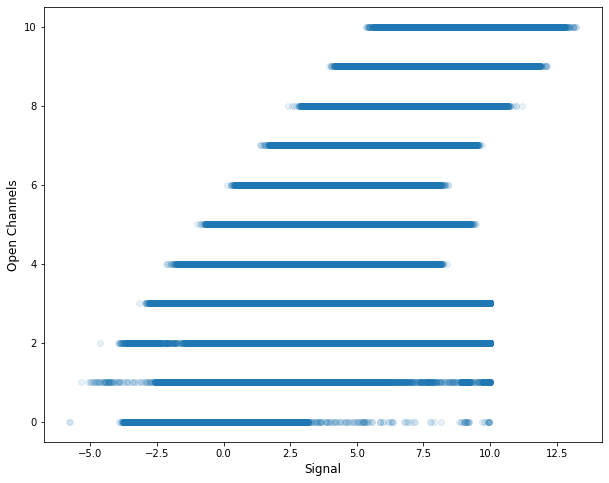

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(trainOrigin.signal, trainOrigin.open_channels, alpha=0.1)
ax.set_xlabel('Signal', fontsize=12);
ax.set_ylabel('Open Channels', fontsize=12);


Khi nhìn vào hình trên. Ta sẽ thấy một số signal có trong cả 11 lớp. Một số signal chỉ ở open_channel 0, các signal khác ở open_channel 0,1,2,3,4.

Sau khi kiểm tra dữ liệu, ta thấy rằng `Signal`(tín hiệu điện) và `Open_Channels`(số kênh mở) có mối tương quan rất lớn với nhau. Và khi quan sát dữ liệu tập train ta thấy có một số bất thường. Chúng ta sẽ xử lí nó ở phần sau.

#### 2.1. Căn chỉnh tín hiệu và các kênh bằng hồi quy tuyến tính

Việc chuyển đổi khá đơn giản, tác giả sử dụng hàm hồi quy tuyến tính 1 chiều để điều chỉnh tín hiệu với công thức hồi quy như dưới:<br>
$$ \hat x = o + sx $$
- o là chặn (intercept)
- s là độ dốc (slope) của đường hồi quy.

Độ dốc của đường hồi quy (s) của từng category có giá trị như nhau (0.8107). Về o thì chia làm 3 giá trị:
- 2.180783  với category 1
- 2.221318 với các category 2, 3, 4, 6
- 4,4288541 với category 5

Và khi khám phá dữ liệu ta sẽ thấy có một đoạn từ dòng 3.6m-3.9m bị bất thường. Do đó ta nên loại nó ra khỏi dữ liệu.

##### code

In [ ]:
train = pd.read_csv('train_clean.csv')
test = pd.read_csv('test_clean.csv')

In [ ]:
# Bắt đầu với các batches (* 100_000)
BATCHES = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 65, 70])

# The data categories of our batches (5 of them have been identified in Chris Deotte 
# "One Feature Model notebook"). But we have noticed a 6th type in the test data.
CATEGORIES = np.array([1, 1, 2, 3, 5, 4, 2, 3, 4, 5, 6, 3, 4, 6, 2, 5, 4, 5, 6, 3, 6, 6])

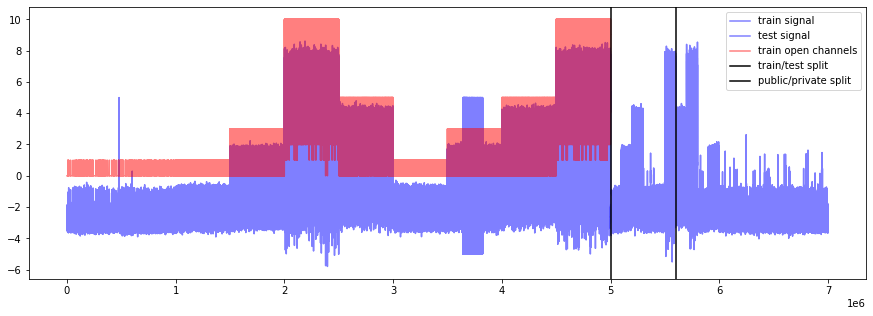

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train['signal'], label='train signal', c='b', alpha=0.5)
plt.plot(range(len(train), len(train) + len(test)), test['signal'], label='test signal', c='b', alpha=0.5)
plt.plot(train['open_channels'], c='r', label='train open channels', alpha=0.5)
plt.axvline(5_000_000, c='k', label='train/test split')
plt.axvline(5_600_000, c='k', label='public/private split')
plt.legend()
plt.show()

In [ ]:
for c in range(1, 6):
    # Lấy dữ liệu huấn luyện tương ứng với các categories
    ix = np.where(CATEGORIES[:-11] == c)[0]
    starts = BATCHES[ix]
    ends = BATCHES[ix + 1]
    X = []
    y = []
    for start, end in zip(starts, ends):
        subsignal = train['signal'].values[start*100_000:end*100_000]
        subtarget = train['open_channels'].values[start*100_000:end*100_000]
        
        # Bỏ qua phần bất thường giữa 3.6M - 3.9M
        if start == 35:
            subsignal = list(subsignal[:100_000]) + list(subsignal[-100_000:])
            subtarget = list(subtarget[:100_000]) + list(subtarget[-100_000:])
        
        X.extend(subsignal)
        y.extend(subtarget)
    X = np.array(X)
    y = np.array(y)
    
    #Tạo dataframe với các dữ liệu của chúng ta, 
    #thay vì nhóm theo kênh mở và lấy theo giá trị trung bình
    df = pd.DataFrame(np.hstack((X.reshape(-1, 1),
                                 y.reshape(-1, 1))),
                      columns=['X', 'y'])
    means = df.groupby('y')[['X']].mean()
    X = means['X'].values
    y = means.index.values
    
    # Huấn luyện với mô hình Linear regression
    lr = LinearRegression()
    lr.fit(X.reshape(-1, 1), y)
    print(c, lr.intercept_, lr.coef_)

1 2.204145338888842 [0.80862586]
2 2.2169991958143207 [0.81071421]
3 2.2229470830947 [0.81240389]
4 2.22104339998811 [0.80972639]
5 4.451422627735052 [0.80219267]


In [ ]:
# As we tuned the entire pipeline during the competition, we also adjusted these
# values a little bit and checked the impact on our training F1 score. Below
# are our final values:
OFFSETS = [2.180783, 2.221318, 2.221318, 2.221318, 4.4288541, 2.221318]
SLOPE = 0.8107

signal = np.concatenate((train['signal'].values, test['signal'].values))
for i, (start, end) in enumerate(zip(BATCHES[:-1], BATCHES[1:])):
    c = CATEGORIES[i] - 1
    signal[start*100_000:end*100_000] = OFFSETS[c] + SLOPE * signal[start*100_000:end*100_000]

train['signal'] = signal[:5_000_000]
test['signal'] = signal[5_000_000:]

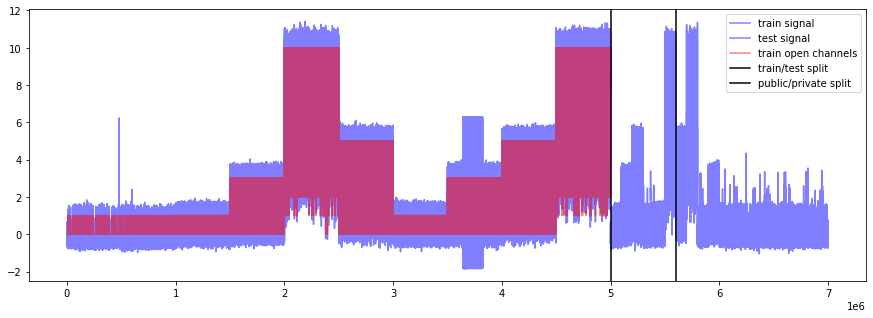

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train['signal'], label='train signal', c='b', alpha=0.5)
plt.plot(range(len(train), len(train) + len(test)), test['signal'], label='test signal', c='b', alpha=0.5)
plt.plot(train['open_channels'], c='r', label='train open channels', alpha=0.5)
plt.axvline(5_000_000, c='k', label='train/test split')
plt.axvline(5_600_000, c='k', label='public/private split')
plt.legend()
plt.show()

In [ ]:
# Let's check what our F1 score would be if we just round our signal values
#Kiểm tra với độ đo F1_score nếu chúng ta chỉ làm tròn giá trị tín hiệu.
good_ids = list(range(0, 3_600_000)) + list(range(3_900_000, 5_000_000))
f1_score(train['open_channels'].values[good_ids], 
         np.clip(np.round(train['signal'].values[good_ids]).astype(int), 0, 10), 
         average='macro')

0.9211271639823664

In [ ]:
train.to_csv('train_1.csv', index=False)
test.to_csv('test_1.csv', index=False)

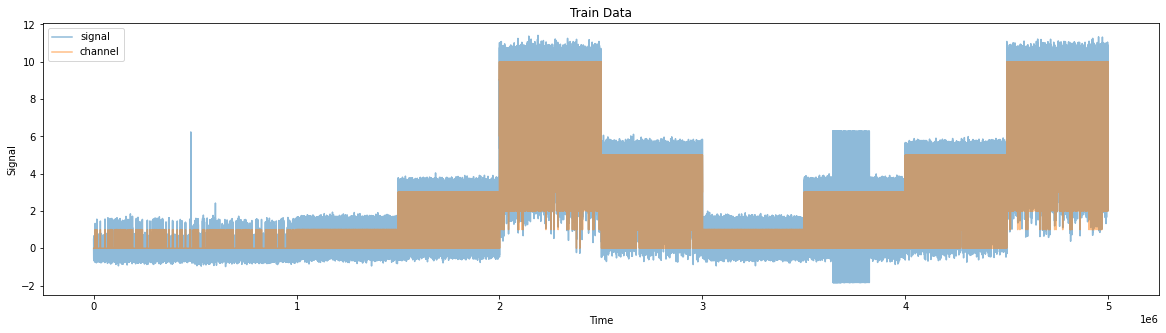

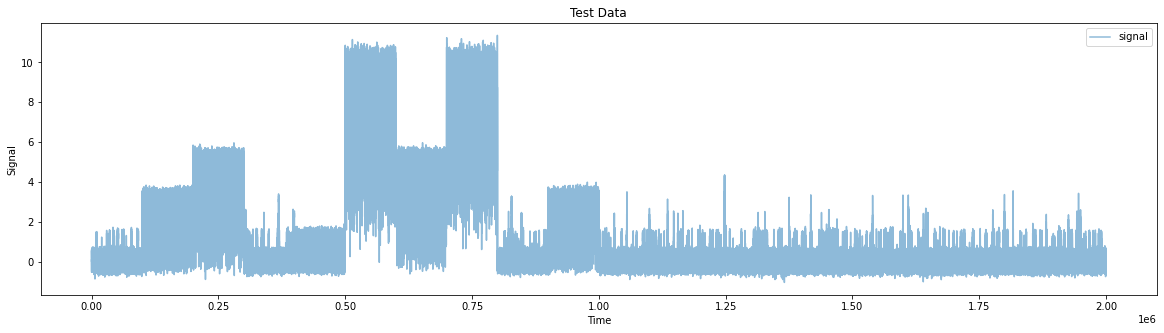

In [ ]:
plt.plot(train['signal'],label='signal', alpha=0.5);
plt.plot(train['open_channels'], label="channel", alpha=0.5);
plt.legend();
plt.ylabel('Signal');
plt.xlabel('Time');
plt.title('Train Data');
plt.show()
plt.plot(test['signal'],label='signal', alpha=0.5)
plt.legend();
plt.ylabel('Signal');
plt.xlabel('Time');
plt.title('Test Data');
plt.show()

**=> Ta thấy dữ liệu khi căn chỉnh thì tín hiệu điện hiện đã tương ứng rất tốt với số kênh mở tương ứng**

#### 2.2. Khử nhiễu 50Hz

Ngay sau khi bắt đầu cuộc thi, tác giả phát hiện ra rằng ban tổ chức cuộc thi đã đưa vào dữ liệu nhiễu nhân tạo. Sau đó tác giả tiến hành khử nhiễu bằng cách sử dụng một hàm sin với tần số rất thấp (với chu kỳ là 1.000.000 giá trị)

Ta có thể kiểm tra nhiễu bằng cách tính toán như sau:


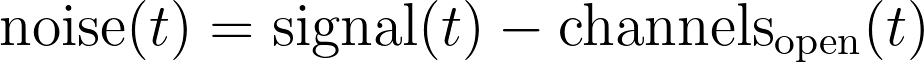

##### code

In [ ]:
import scipy.optimize as opt
from collections import defaultdict

In [ ]:
train = pd.read_csv('train_1.csv')
test = pd.read_csv('test_1.csv')
predictions = pd.read_csv('Ys.csv', index_col=None, skiprows=1, header=None).values.flatten()

In [ ]:
signal = np.concatenate((train['signal'].values, test['signal'].values))
noise = signal - (0.2 * predictions + 0.8 * np.round(predictions))
offset = np.median(noise)
noise = noise - offset
noise = np.clip(noise, -0.8, 0.8)
train['signal'] = signal[:5_000_000]
test['signal'] = signal[5_000_000:]

Dưới đây là biểu đồ của 10000 giá trị nhiễu đầu tiên trong tập huấn luyện:

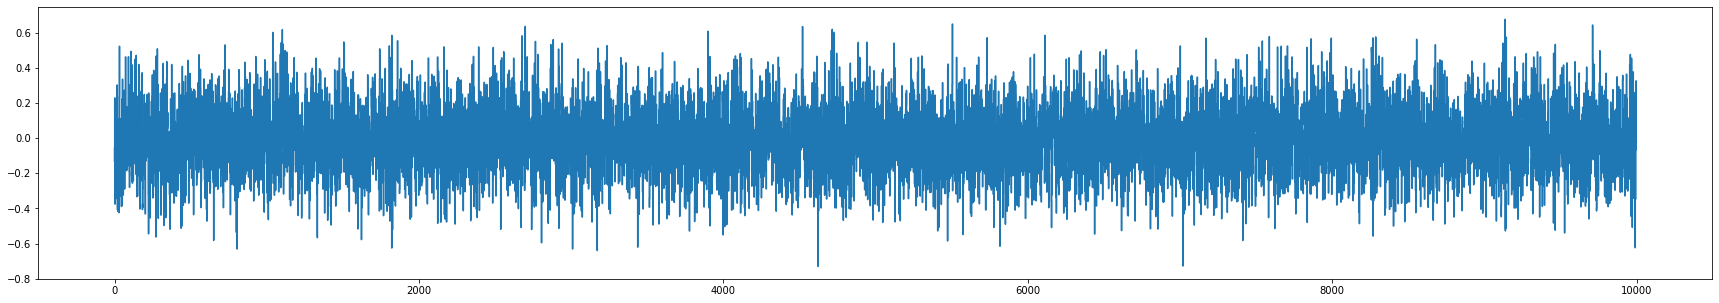

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(noise[:10000],drawstyle= 'steps')
plt.show()

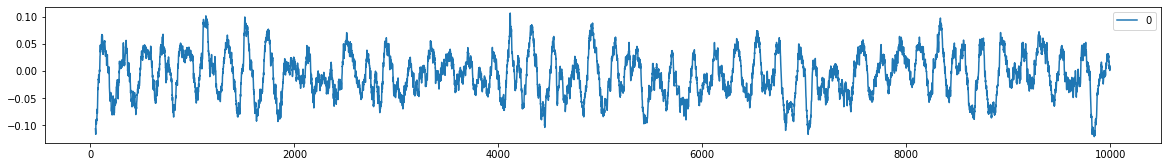

In [ ]:
a= pd.DataFrame(noise[:10000])
a.rolling(window=50).mean().plot(figsize=(20,2.5))
plt.show()

Chúng ta có thể thấy rõ một sóng có đỉnh trung bình cứ sau 200 giá trị. Tín hiệu tuần hoàn, được đo ở tần số lấy mẫu 10 kHz, với chu kỳ khoảng 200, tương ứng với tần số 50 Hz. Nó chỉ ra rằng nguồn điện xoay chiều ở Anh có tần số 50 Hz! Để loại bỏ,
chúng ta sẽ điều chỉnh hàm sin trên mỗi lô 100000 giá trị nhiễu. Mặc dù các kỹ thuật xử lý tín hiệu, chẳng hạn như bộ lọc dải thông và dải băng tần cũng có thể thực hiện điều này, nhưng bằng cách sử dụng một hàm sin đơn giản lại kết quả tốt hơn. Nó cũng chỉ ra rằng có nhiều thành phần trong hàm sin (tức là nhiều sóng sin với các biên độ, pha và tần số khác nhau) hoạt động tốt nhất.

In [ ]:
CATEGORIES = np.array([1, 1, 2, 3, 5, 4, 2, 3, 4, 5, 6, 3, 4, 6, 2, 5, 4, 5, 6, 3, 6, 6])

In [ ]:
CAT5_SIN_PARAMS = [
# 1st train batch (0-100K)
[0.057, 0.0313961337824152, -1.9582981618981699, 
 0.052000000000000005, 0.0313373879661514, -0.894787657310209, 
 0.00312544415186912, 0.71604979030357, 1.4740988377606499, 
 0.0, 0.764755919779924, 0.0829734133838624],
# 1st train batch (100K-200K)
[0.057, 0.0313095771558318, -0.35820841715589197, 
 0.0569999999999976, 0.031379394855977204, -0.230748302134919,
 0.00253486686822344, 0.715851225706187, -0.026387038081517898, 
 0.0, 0.7465297968654719, -0.0894642790306936],
# 1st train batch (200K-300K)
[0.05263655157016801, 0.0314659272351229, 0.721245080052644, 
 0.052000000000000005, 0.0313174115779501, -1.37524249139897, 
 0.00226771045170094, 0.715873941177297, 0.56031287795554, 
 0.0019583453631626, 0.7286561468259489, -1.02618438535636],
# 1st train batch (300K-400K)
[0.057, 0.0313245064928946, 2.06319152201257, 
 0.052000000003234, 0.031446893905081, -1.6084985645729901, 
 0.00204345494144802, 0.71565222942307, -1.89474551042615, 
 0.0026604410809482797, 0.7284881442918499, 0.7151709270600919],
# 1st train batch (400K-500K)
[0.056679791179581704, 0.031382822206142295, -3.5348478221412, 
0.052000000000000005, 0.0313178273242294, -1.00966029805514, 
 0.0016164838108070302, 0.716048844816851, -2.59390758029503e-05, 
 0.00210240831407528, 0.727720466174145, 0.706750747651938],
# 2nd train batch (0-100K)
[0.052000000000000005, 0.0313670674841525, -1.37434901558769, 
 0.0520000000021022, 0.0313783360445586, 2.92821291855846, 
 0.00247837389454667, 0.7158583949172861, -0.40179295728015496, 
 0.00437980418941088, 0.728349991781816, 3.73281587410011],
# 2nd train batch (100K-200K)
[0.0520000000000012, 0.0313514090723553, -0.7592491943882651, 
 0.052000000000000005, 0.031413273914979195, 0.935896221804064, 
 0.00206902568326639, 0.715918789583516, -1.35448757805627, 
 0.00166972502016302, 0.728623972795409, -1.4221758956342],
# 2nd train batch (200K-300K)
[0.052000000000287205, 0.0313326971169099, 1.4075870088394502, 
 0.0554068634006138, 0.0313842512482485, 0.048745427259011403, 
 0.0025172803889046804, 0.7155805029559871, 0.5406817908985491, 
 0.00161604404966698, 0.729016882437157, 1.8120270717328],
# 2nd train batch (300K-400K)
[0.052000000000000005, 0.031409876692340605, -0.7456245686622709, 
 0.0520000000001529, 0.0313705465395396, 0.936863731408621, 
 0.00277763601864694, 0.71570598138205, -1.44532928551161, 
 0.00211063918551229, 0.728488636873564, -1.68280443918254],
# 2nd train batch (400K-500K)
[0.057, 0.0313882617049079, 1.03970925443823, 
 0.0569999997793795, 0.031387205017098, -4.4219546144679995, 
 0.0033378429937860198, 0.7159949659289311, -0.592157376889125, 
 0.0, 0.7701378258839879, -0.578583201201017],
# Public LB Part
[0.052000000000000005, 0.031340030736758, 2.03496434423533, 
 0.057, 0.0313644869979618, 5.994735891834329, 
 0.0030110230573384, 0.71556629357372, 3.95735883922847, 
 0.0, 0.718902128677972, 0.0990162017704937],
# Private LB Part
[0.052000000000000005, 0.0313962479935369, 2.25668278709478, 
 0.052000000000000005, 0.0313859582890873, -4.05125563031034, 
 0.00235983507549681, 0.715410020428299, -0.0953467752653618, 
 0.0, 0.7255387616378449, -1.89409831367182]
]

In [ ]:
def sin_1(t, A, w, p):
    return A * np.sin(w*t + p)

def sin_4(t, A1, w1, p1, A2, w2, p2, A3, w3, p3, A4, w4, p4):
    return A1 * np.sin(w1*t + p1) + A2 * np.sin(w2*t + p2) + A3 * np.sin(w3*t + p3) + A4 * np.sin(w4*t + p4)

def get_guess(tt, yy, components=1):
    """Initialize amplitudes at 0.053, phases at 0 and get the frequencies 
    corresponding to the highest strengths."""
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    freqs = ff[np.argsort(Fyy[1:])[::-1] + 1]
    result = set()
    for f in freqs:
        result.add(abs(f))
        if len(result) == components:
            break
    guess = []
    for f in result:
        guess += [0.053, min(0.0315, max(0.031, 2*np.pi*f)), 0]
    
    return guess

def fit_sin1(tt, yy):
    '''Fit sine wave to the input time sequence'''
    # Taken from: https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy
    guess = np.array(get_guess(tt, yy))
    popt, pcov = opt.curve_fit(sin_1, tt, yy, p0=guess, maxfev=10000)
    return {"parameters": popt, "fitfunc": lambda t: sin_1(t, *popt)}


def fit_sin(signal, channels, c, b):
    # This noise calculation worked better than a simple signal - channels
    noise = signal - (0.2 * channels + 0.8 * np.round(channels))
    offset = np.median(noise)
    noise = noise - offset
    noise = np.clip(noise, -0.8, 0.8)
    if c != 5:
        results = fit_sin1(np.arange(len(noise)), noise)
    else:
        results = {'fitfunc': lambda t: sin_4(t, *CAT5_SIN_PARAMS[b])}
    plt.figure(figsize=(8, 5))
    plt.plot(noise[:10000])
    plt.plot(results['fitfunc'](np.arange(len(signal)))[:10000])
    plt.show()
        
    return signal - results['fitfunc'](np.arange(len(signal))) - offset

def remove_power_line(signal, predictions):
    """Iterate over segments of 100K and remove the power line interference"""
    count_per_cat = defaultdict(int)
    for i, (start, end) in enumerate(zip(BATCHES[:-1], BATCHES[1:])):
        c = CATEGORIES[i]
        for k in range(end - start):
            sub_start = (start + k) * 100_000
            sub_end = (start + k + 1) * 100_000
            signal[sub_start:sub_end] = fit_sin(signal[sub_start:sub_end], 
                                                predictions[sub_start:sub_end], 
                                                c, count_per_cat[c])
            count_per_cat[c] += 1
    return signal

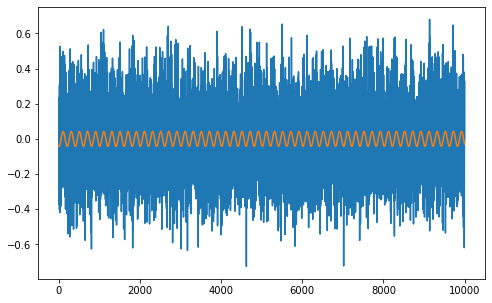

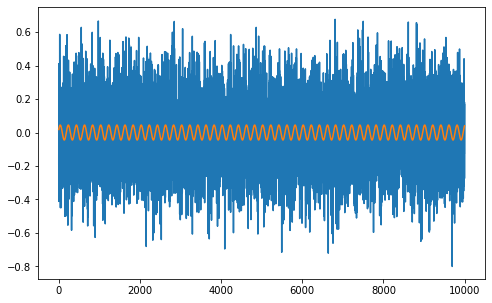

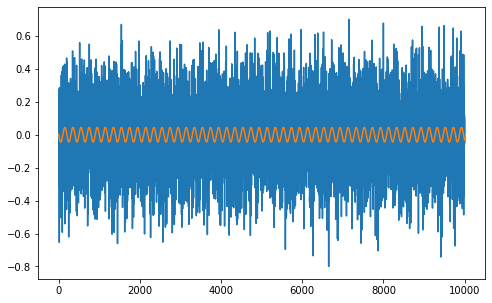

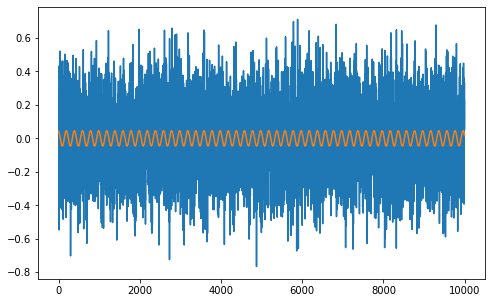

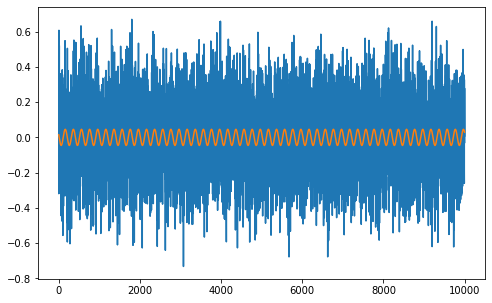

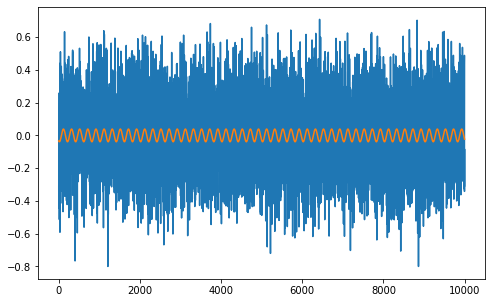

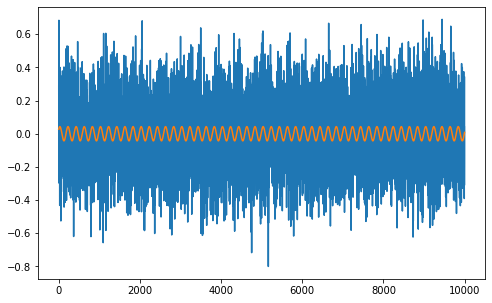

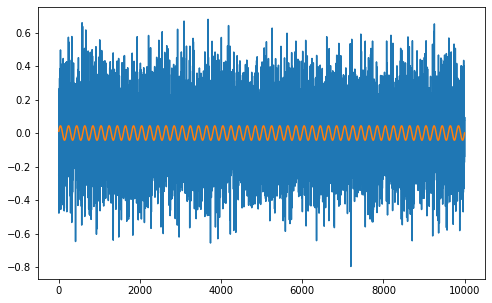

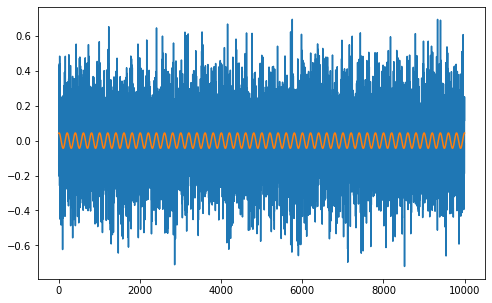

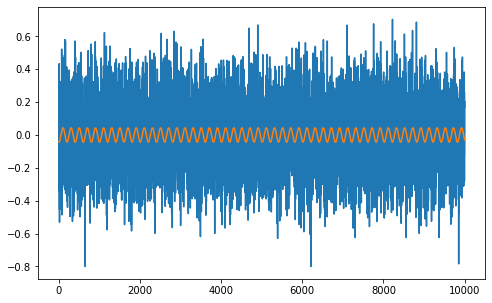

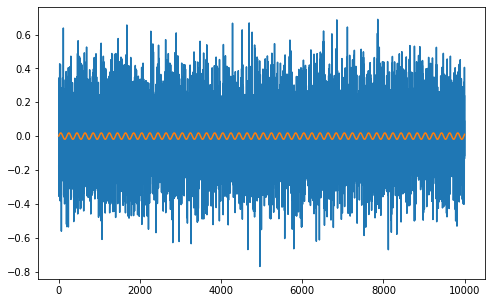

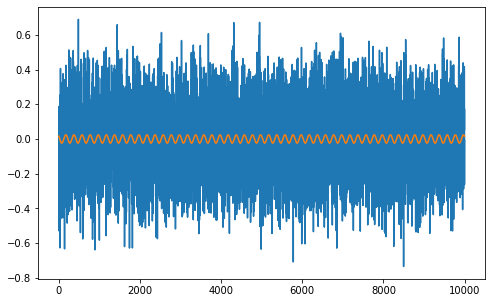

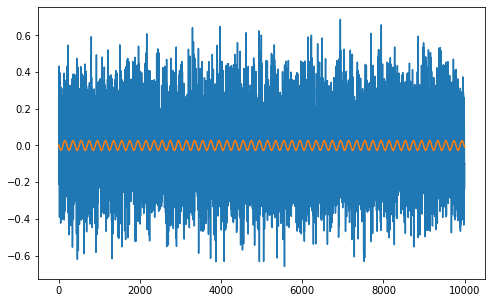

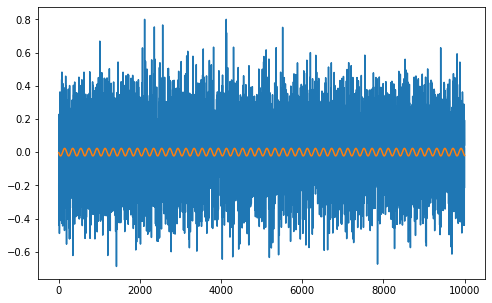

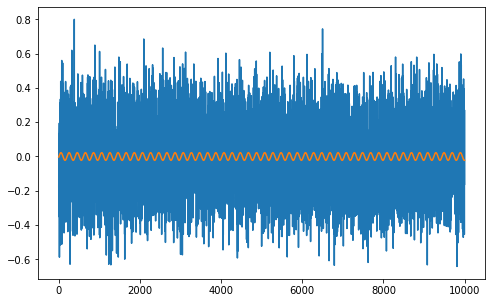

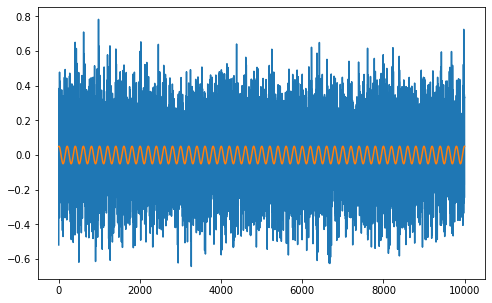

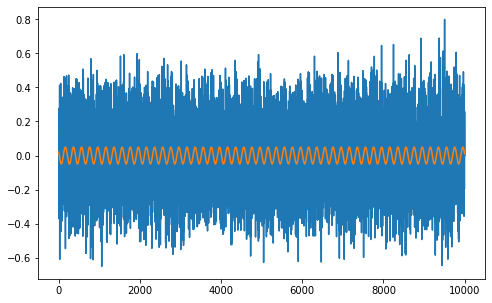

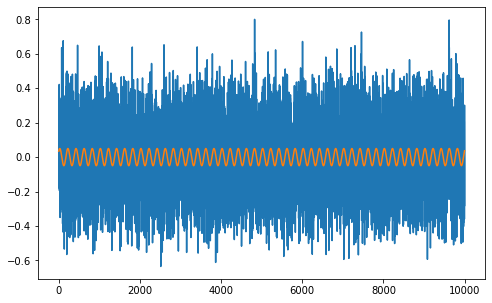

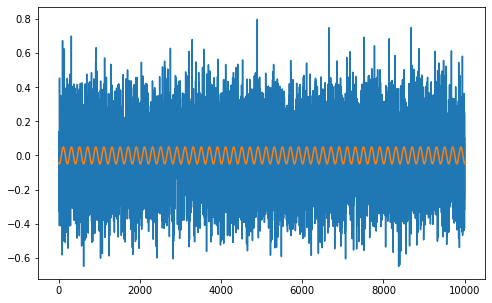

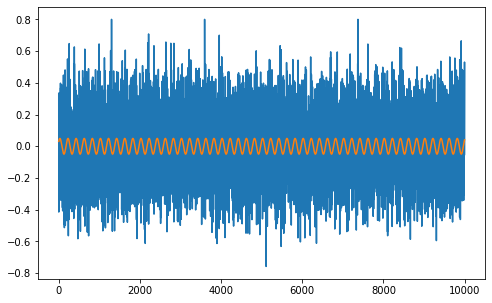

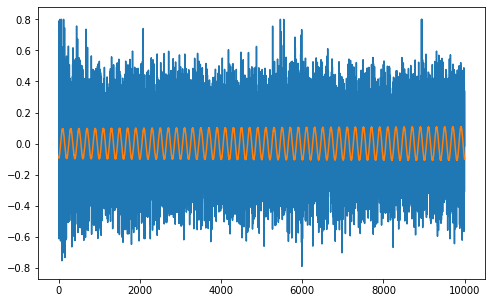

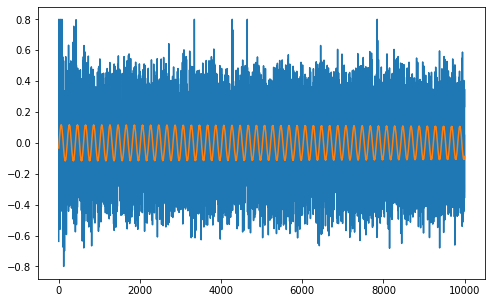

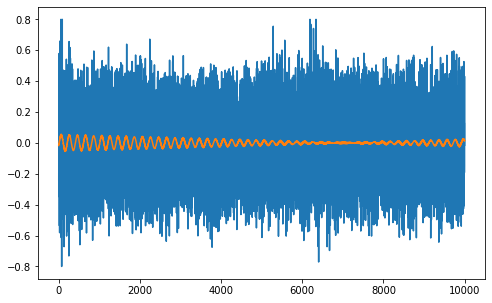

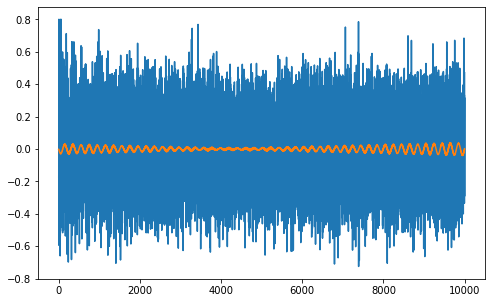

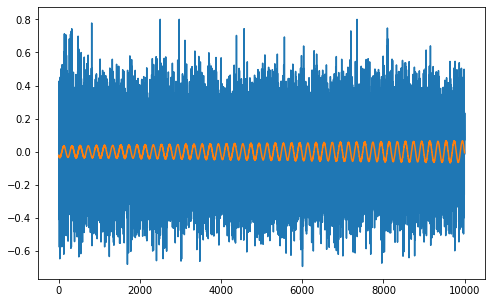

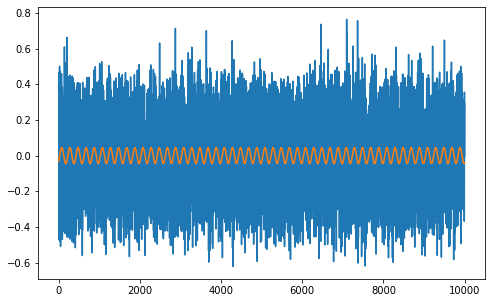

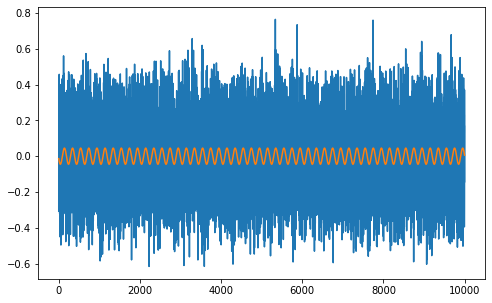

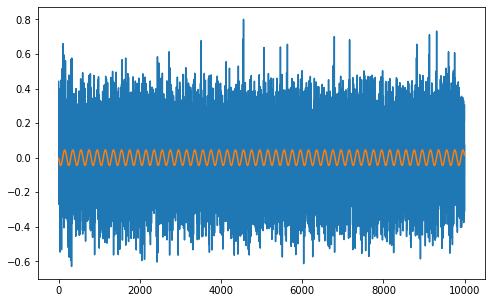

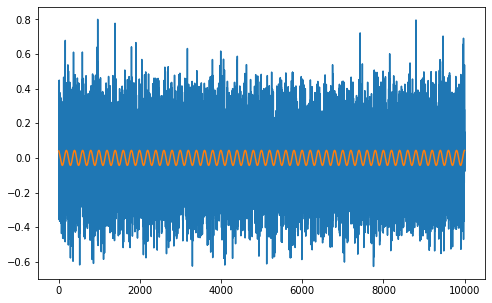

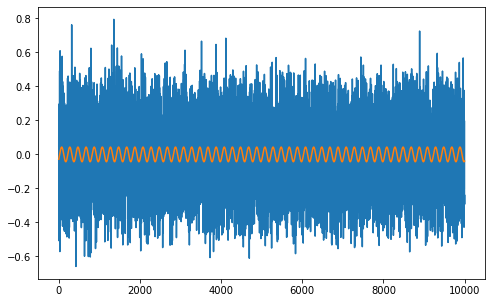

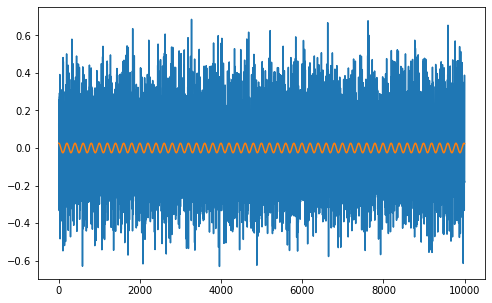

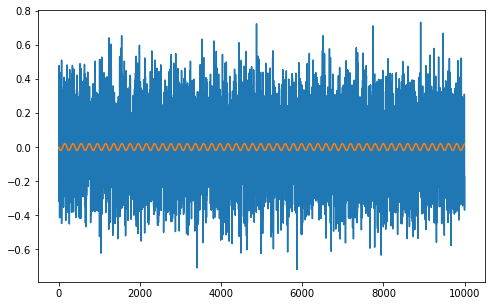

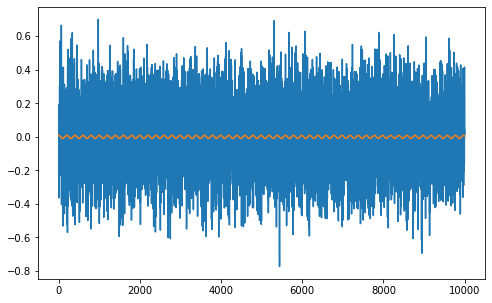

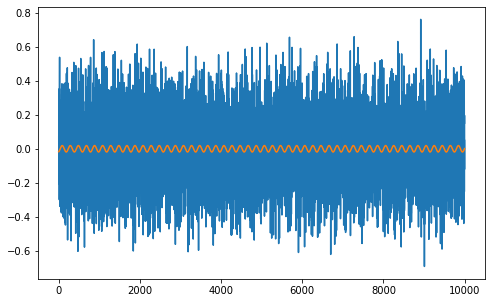

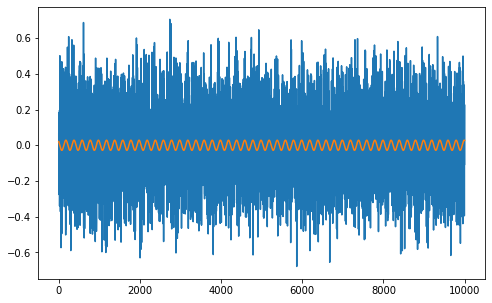

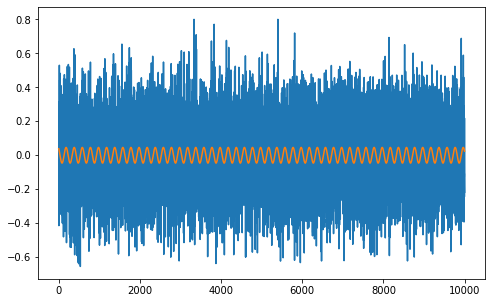

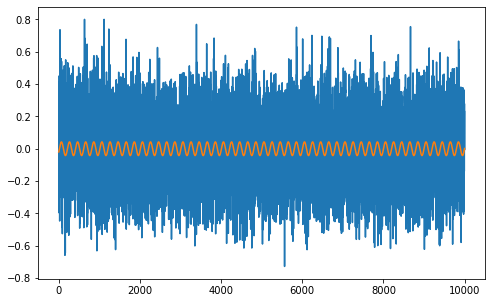

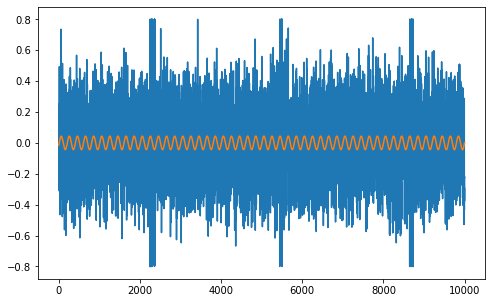

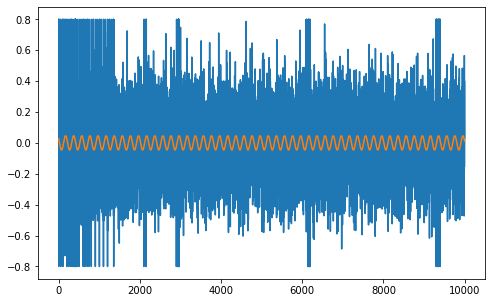

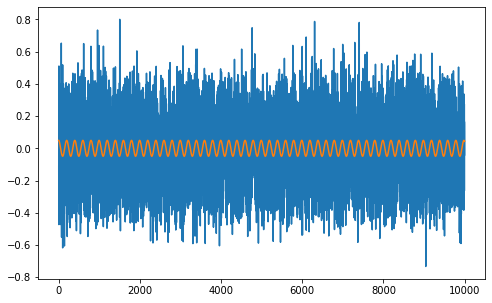

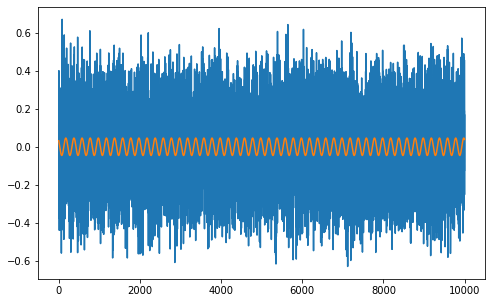

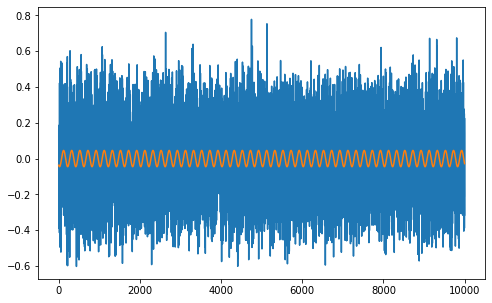

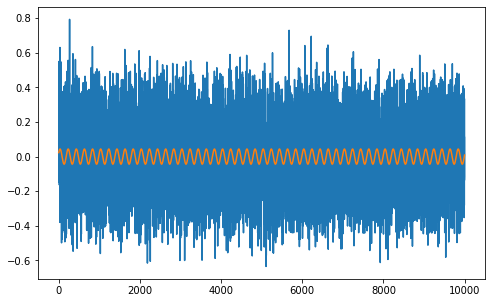

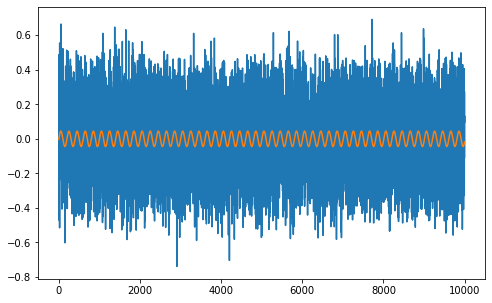

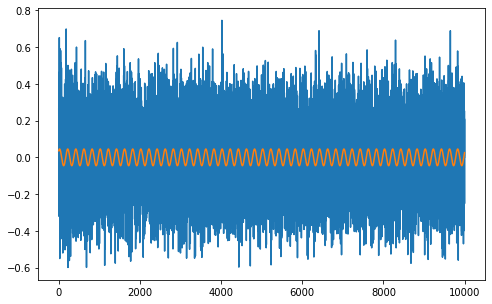

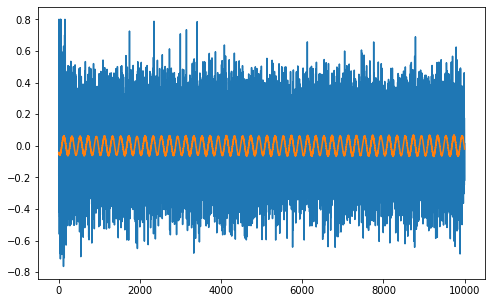

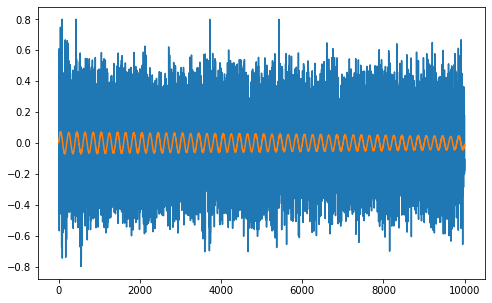

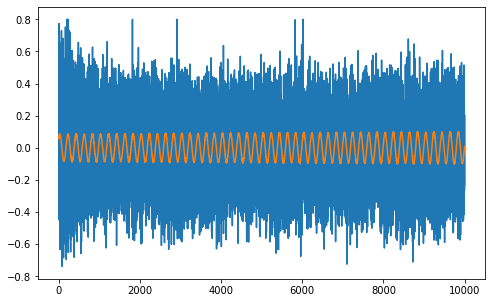

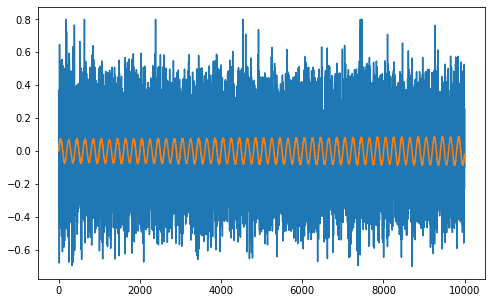

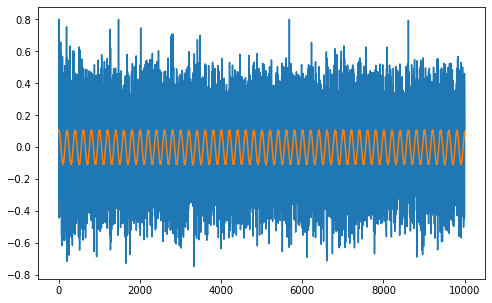

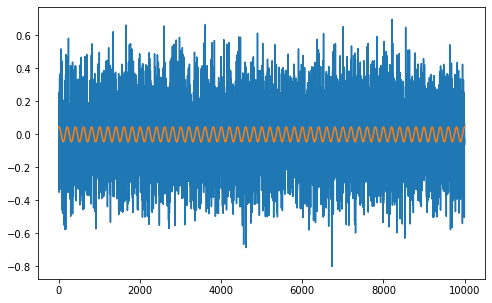

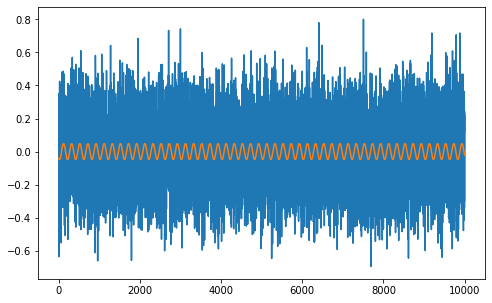

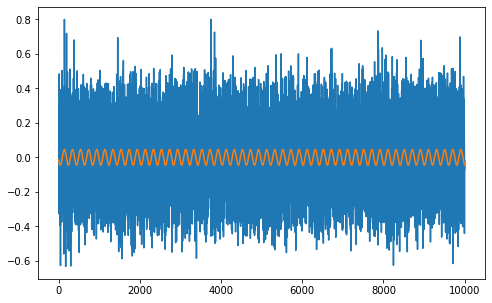

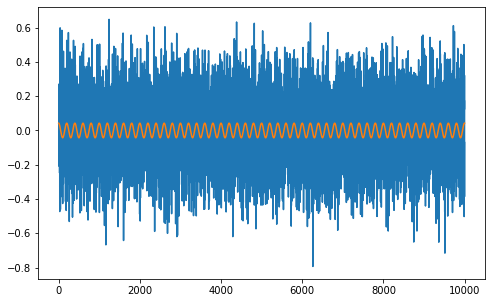

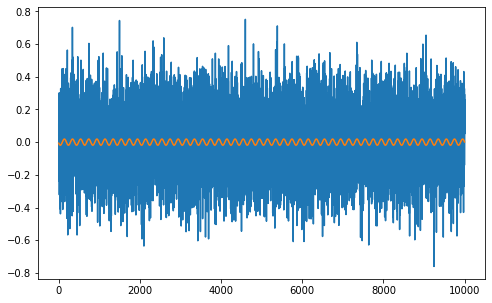

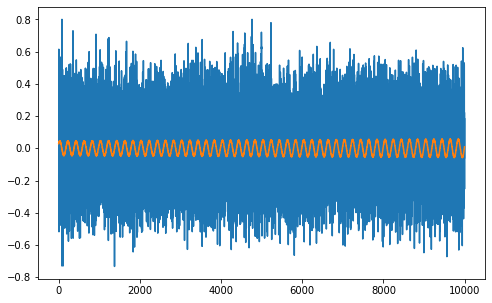

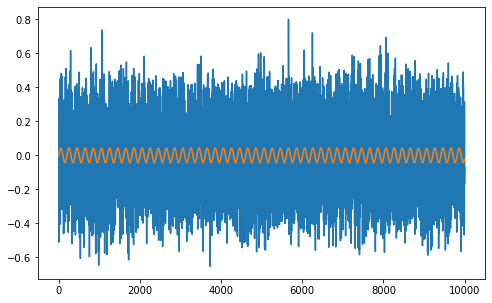

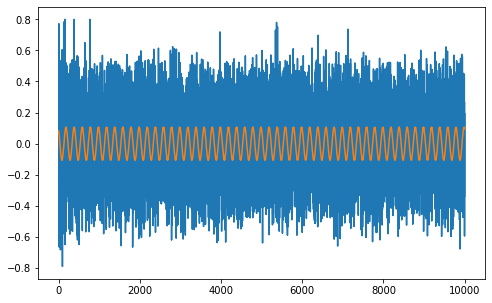

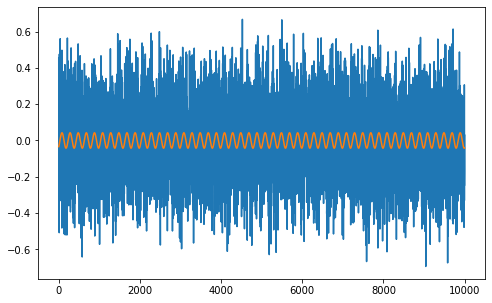

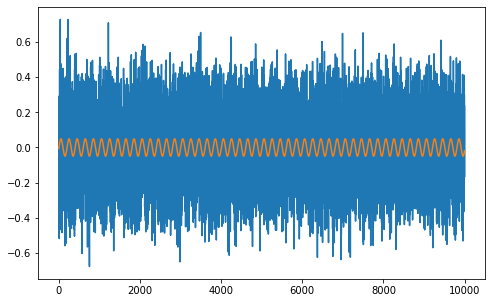

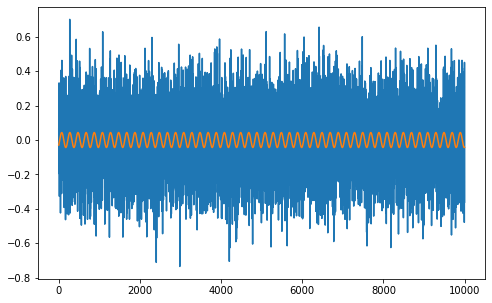

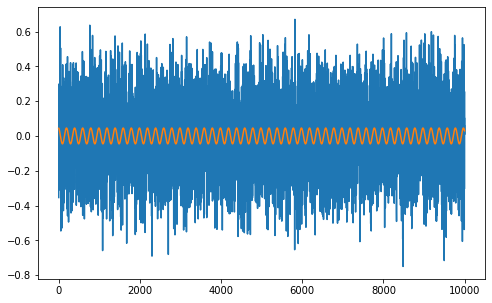

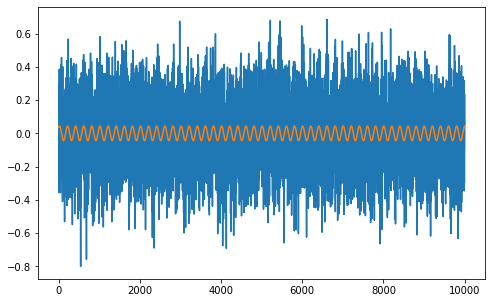

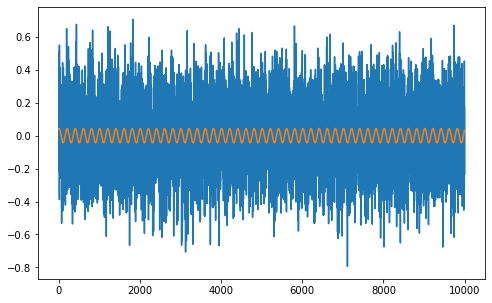

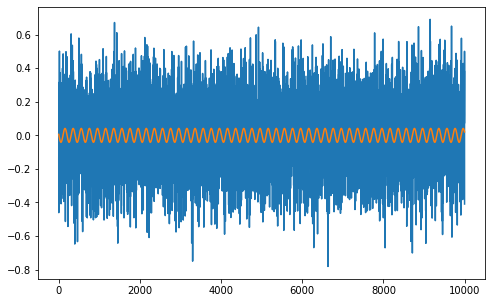

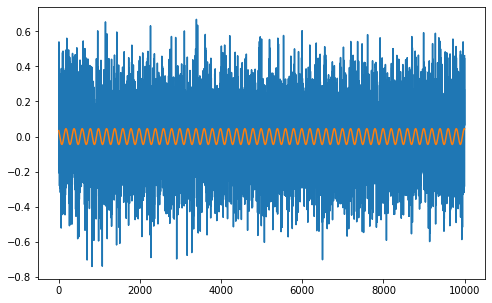

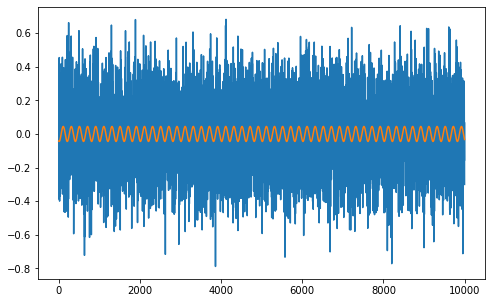

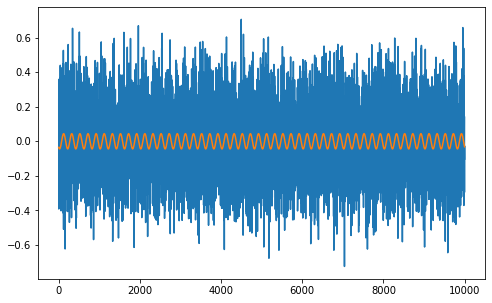

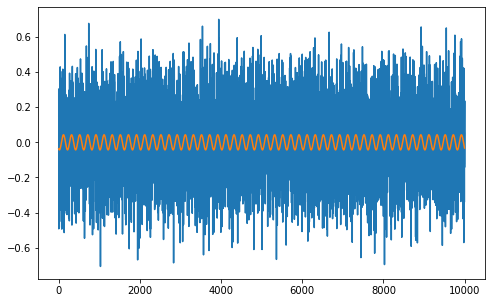

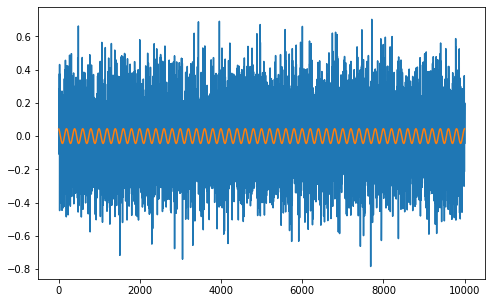

In [ ]:
signal = np.concatenate((train['signal'].values, test['signal'].values))
remove_power_line(signal, predictions)
train['signal'] = signal[:5_000_000]
test['signal'] = signal[5_000_000:]

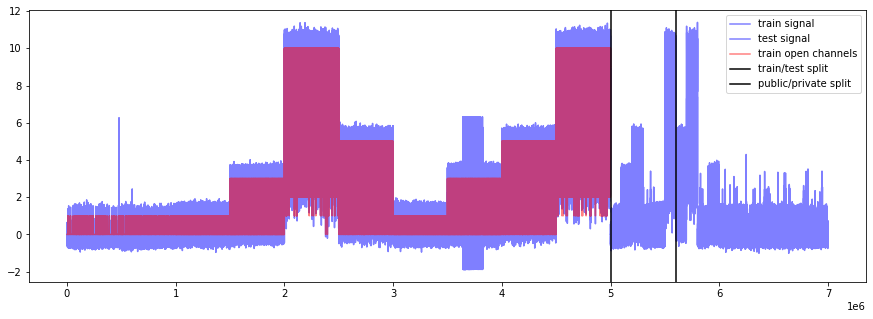

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(train['signal'], label='train signal', c='b', alpha=0.5)
plt.plot(range(len(train), len(train) + len(test)), test['signal'], label='test signal', c='b', alpha=0.5)
plt.plot(train['open_channels'], c='r', label='train open channels', alpha=0.5)
plt.axvline(5_000_000, c='k', label='train/test split')
plt.axvline(5_600_000, c='k', label='public/private split')
plt.legend()
plt.show()

In [ ]:
# Did this improve our simple baseline as the noise is reduced?
good_ids = list(range(0, 3_600_000)) + list(range(3_900_000, 5_000_000))
f1_score(train['open_channels'].values[good_ids], 
         np.clip(np.round(train['signal'].values[good_ids]).astype(int), 0, 10), 
         average='macro')

0.9250193100885252

In [ ]:
train.to_csv('train_2.csv', index=False)
test.to_csv('test_2.csv', index=False)

#### 2.3. Tiếp cận Naive HMM

Ở bước này, tác giả điều chỉnh một HMM có số trạng thái ẩn bằng số kênh mở duy nhất trong mỗi lô(batch). Đây là một cách tiếp cận đơn giản mà tác giả  đã cải thiện dựa trên đường cơ sở của các giá trị làm tròn của tín hiệu .

Ta có, Mô hình Markov ẩn được xác định bởi các tham số sau:
* Số lượng trạng thái ẩn (=K)
* Xác suất khởi tạo (vectơ có kích thước K)
* Ma trận chuyển tiếp (ma trận K x K)
* Xác suất phát xạ. Mỗi trạng thái ẩn phát ra một giá trị quan sát nhất định. Các phát xạ này có thể có các phân bố khác nhau, chẳng hạn như multi-nomial cho phát xạ rời rạc và một Gaussian cho phát xạ liên tục (vì tín hiệu điện là liên tục nên ta sử dụng phát xạ liên tục).


Tóm lại, các kênh mở (biến ẩn) tuân theo một quy trình Markov nhất định và chuyển từ giá trị này sang giá trị khác với các xác suất nhất định được xác định bởi ma trận chuyển tiếp. Khi quy trình Markov ở một trạng thái ẩn nó sẽ phát ra một giá trị có thể quan sát được gọi là tín hiệu điện.

##### code

In [ ]:
!pip install hmmlearn==0.2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 363 kB 13.8 MB/s 


In [ ]:
import seaborn as sns
from hmmlearn.hmm import GaussianHMM


In [ ]:
# Sử dụng kết quả từ bước 2
train = pd.read_csv('train_2.csv')
test = pd.read_csv('test_2.csv')

In [ ]:
CATEGORIES = np.array([1, 1, 2, 3, 5, 4, 2, 3, 4, 5, 6, 3, 4, 6, 2, 5, 4, 5, 6, 3, 6, 6])
CATEGORY = 2

signal = np.concatenate((train['signal'].values, test['signal'].values))

ix = np.where(CATEGORIES == CATEGORY)[0]
starts = BATCHES[ix]
ends = BATCHES[ix + 1]

X = []
y = []
for start, end in zip(starts, ends):
    subsignal = signal[start*100_000:end*100_000]
    if start < 50:
        subchannels = train['open_channels'].values[start*100_000:end*100_000]
    else:
        subchannels = [-1]*((end-start)*100_000)
        
    if start == 35:
        subsignal = list(subsignal[:100000]) + list(subsignal[-100000:])
        subchannels = list(subchannels[:100000]) + list(subchannels[-100000:])
    
    X.extend(subsignal)
    y.extend(subchannels)
    
X = np.array(X)
y = np.array(y)
print(len(X), len(y))

1100000 1100000


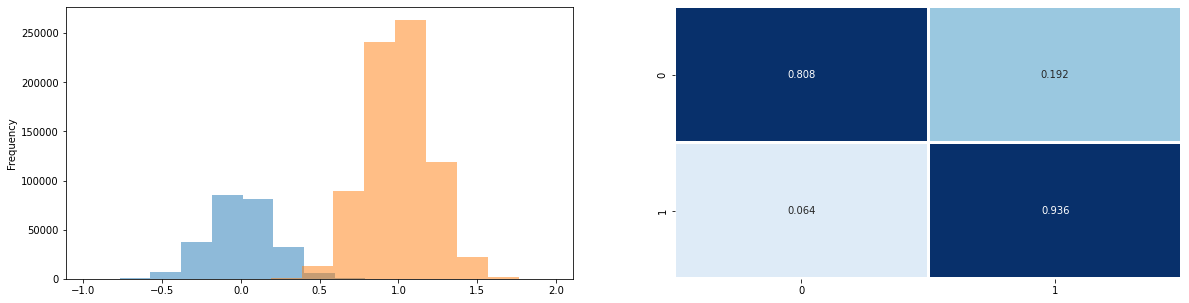

         1     -113729.6353             +nan
         2     -113649.6671         +79.9683
         3     -113647.1743          +2.4928
         4     -113647.0265          +0.1478
         5     -113647.0169          +0.0096


In [ ]:
def markov_p_trans(states):
    # https://www.kaggle.com/friedchips/the-viterbi-algorithm-a-complete-solution
    max_state = np.max(states)
    states_next = np.roll(states, -1)
    matrix = []
    for i in range(max_state + 1):
        current_row = np.histogram(states_next[states == i], bins=np.arange(max_state + 2))[0]
        if np.sum(current_row) == 0: # nếu 1 trạng thái không xuất hiện trong các trạng thái
            current_row = np.ones(max_state + 1) / (max_state + 1) # ...sử dụng xác suất đồng nhất
        else:
            current_row = current_row / np.sum(current_row) # chuẩn hóa về 1
        matrix.append(current_row)
    return np.array(matrix)

f, ax = plt.subplots(1, 2, figsize=(20, 5))

# Ước lượng ma trận chuyển đổi dựa trên ground truth
Ptran = markov_p_trans(y[y >= 0])
sns.heatmap(
    Ptran,
    annot=True, fmt='.3f', cmap='Blues', cbar=False,
    ax=ax[1], vmin=0, vmax=0.5, linewidths=2);


# Ước lượng trung bình và hiệp phương sai cho mỗi giá trị ground truth duy nhất
means = []
covs = []
for c in sorted(np.unique(y[y >= 0])):
    pd.Series(X[y == c]).plot(kind='hist', ax=ax[0], alpha=0.5)
    means.append(np.mean(X[y == c]))
    covs.append(np.cov(X[y == c]))
    
plt.show()
    
# Xác định HMM
n_classes = len(np.unique(y[y >= 0]))
hmm = GaussianHMM(
    n_components=n_classes,             # Số trạng thái ẩn
    n_iter=50,                          # Tổng số lần lặp
    verbose=True,                       # Hiển thị logs
    algorithm='map',                    # Sử dụng cực đại một posteriori thay cho Viterbi
    params='stmc',                      # Optimize start probs, transmat, means, covs
    random_state=42,
    init_params='s',                    # Khởi tạo thủ công tất cả trừ các xác suất bắt đầu
    covariance_type='full',             # Hiệp phương sai riêng cho mỗi trạng thái ẩn
    tol=0.01                            # Tiêu chí hội tụ
)

# Khởi tạo các tham số của HMM
hmm.n_features = 1
hmm.means_ = np.array(means).reshape(-1 ,1)
hmm.covars_ = np.array(covs).reshape(-1, 1, 1)
hmm.transmat_ = Ptran

# Fit HMM 
_ = hmm.fit(X.reshape(-1, 1), lengths=[100000]*(len(X) // 100000))

Ví dụ, ta xét category 2 có kênh mở = 0 hoặc 1 và giả sử Mô hình Markov của chúng ta có 2 trạng thái ẩn. Một trạng thái ẩn khi số kênh mở bằng 0 và một trạng thái ẩn khi nó bằng 1. Chúng ta có thể ước tính cả ma trận chuyển tiếp và xác suất phát xạ một cách dễ dàng bằng cách xem dữ liệu train, có nghĩa là đếm chuyển đổi từ trạng thái này sang trạng thái khác và xem xét các giá trị tín hiệu tương ứng với một số kênh mở nhất định.

Ta thấy, nếu số kênh mở bằng 1, thì giá trị tín hiệu cũng sẽ xung quanh 1. Giá trị tiếp theo sẽ bằng 1 với xác suất 93,6% hoặc 0 với xác suất 6,4%. Các thông số này có thể được ước tính bằng cách sử dụng dữ liệu train, hoặc bằng cách áp dụng thuật toán Baum-Welch. Thuật toán này, là một trường hợp đặc biệt của thuật toán Expectation-Maximization - là một thuật toán không được giám sát. Tóm lại, nó sẽ đưa ra các dự đoán dựa trên các tham số ban đầu của nó và sau đó sử dụng các dự đoán này để cập nhật các tham số cho đến khi hội tụ. Sau đó, từ các tham số chúng ta có thể thực hiện suy luận bằng cách áp dụng thuật toán Forward và Backward - trả về ma trận xác suất P, trong đó P[t][k] sẽ là xác suất ở trạng thái ẩn k tại thời điểm t.

##### Dự đoán và tính điểm

In [ ]:
# Đưa ra dự đoán
preds = hmm.predict(X.reshape(-1, 1), lengths=[100000]*(len(X) // 100000))

# Đường cơ sở làm tròn
print(f1_score(y[y >= 0], np.clip(np.round(X[y >= 0]).astype(int), 0, np.max(y)), average='macro'))

# Score của Naive HMM
print(f1_score(y[y >= 0], preds[y >= 0], average='macro'))

0.9737641582485055
0.9840923260389285


#### 2.4. Tìm ma trận chuyển tiếp (trạng thái ẩn > kênh mở)

Khi đọc một bài báo do ban tổ chức xuất bản, rõ ràng là mặc dù số lượng kênh đang mở tuân theo Quy trình Markovian, nhưng chúng lại được tạo ra bởi Mô hình Markov ẩn:
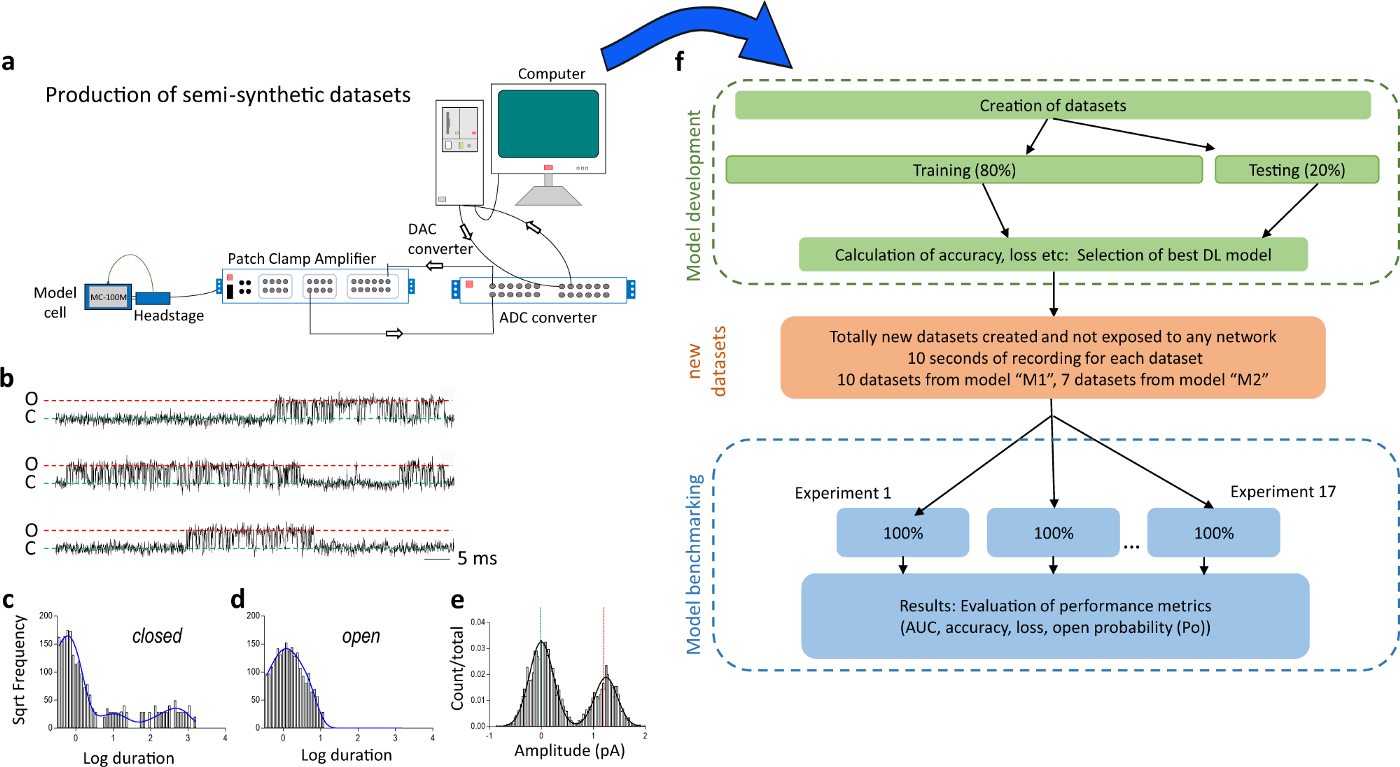
Ground truth (các kênh mở) được tạo ra bởi một Quy trình Markov. Ground truth này sau đó được phát qua bộ khuếch đại kẹp vá và được ghi lại, tạo ra dữ liệu quan sát với noise (tín hiệu điện). Hình vẽ từ một bài báo của ban tổ chức.

##### code

In [ ]:
# Sử dụng lại category 2 data
import seaborn as sns

train = pd.read_csv('train_2.csv')
test = pd.read_csv('test_2.csv')

CATEGORIES = np.array([1, 1, 2, 3, 5, 4, 2, 3, 4, 5, 6, 3, 4, 6, 2, 5, 4, 5, 6, 3, 6, 6])
CATEGORY = 2

signal = np.concatenate((train['signal'].values, test['signal'].values))

ix = np.where(CATEGORIES == CATEGORY)[0]
starts = BATCHES[ix]
ends = BATCHES[ix + 1]

X = []
y = []
for start, end in zip(starts, ends):
    subsignal = signal[start*100_000:end*100_000]
    if start < 50:
        subchannels = train['open_channels'].values[start*100_000:end*100_000]
    else:
        subchannels = [-1]*((end-start)*100_000)
        
    if start == 35:
        subsignal = list(subsignal[:100000]) + list(subsignal[-100000:])
        subchannels = list(subchannels[:100000]) + list(subchannels[-100000:])
    
    X.extend(subsignal)
    y.extend(subchannels)
    
X = np.array(X)
y = np.array(y)
print(len(X), len(y))

1100000 1100000


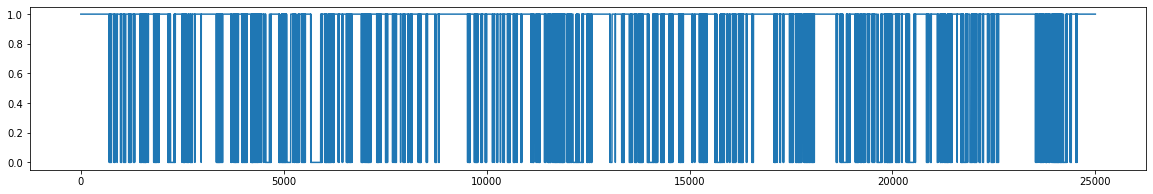

In [ ]:
# We can see "blocks" of open channels = 0 (where it does switches back and forth between 0 and 1)
# and blocks of open_channels = 1 for a long period.
plt.figure(figsize=(20, 3))
plt.plot(y[y >= 0][:25000])
plt.show()

In [ ]:
np.sum(y == 0)/np.sum(y >= 0), np.sum(y == 1)/np.sum(y >= 0)

(0.249199, 0.750801)

In [ ]:
def markov_p_trans(states):
    # https://www.kaggle.com/friedchips/the-viterbi-algorithm-a-complete-solution
    max_state = np.max(states)
    states_next = np.roll(states, -1)
    matrix = []
    for i in range(max_state + 1):
        current_row = np.histogram(states_next[states == i], bins=np.arange(max_state + 2))[0]
        if np.sum(current_row) == 0: # if a state doesn't appear in states...
            current_row = np.ones(max_state + 1) / (max_state + 1) # ...use uniform probability
        else:
            current_row = current_row / np.sum(current_row) # normalize to 1
        matrix.append(current_row)
    return np.array(matrix)

# We will use the self-transition probabilities for the hidden states that
# are not connected to another open_channel value and the other transition
# probabilities for the states that are connected to other open_channel values
markov_p_trans(y[y >= 0])

array([[0.80778815, 0.19221185],
       [0.0637972 , 0.9362028 ]])

Mô hình Markov ẩn này bao gồm nhiều trạng thái ẩn hơn là số lượng giá trị kênh mở duy nhất
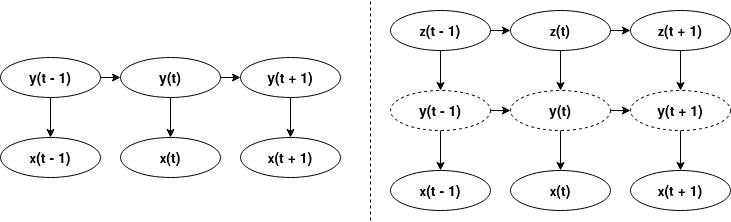

Một cách đơn giản để tiếp cận điều này, là bỏ qua lớp giữa (y (t)) trong mô hình 2-layer . Như vậy, chúng ta có Quy trình Markovian ẩn với số trạng thái ẩn lớn hơn số kênh mở duy nhất. Áp dụng thông tin chi tiết này cho dữ liệu category 2 . Tác giả sử dụng 4 trạng thái ẩn trong HMM của mình (đã thử nghiệm với các con số khác, nhưng 4 trạng thái hoạt động tốt nhất). Hai trạng thái ẩn đầu tiên sẽ tương ứng với khi số kênh mở bằng 1, 2 trạng thái ẩn sau tương ứng với khi số kênh mở bằng 0. Việc ước lượng ma trận chuyển đổi ban đầu hiện nay trở nên khó khăn hơn vì ta không thể ước tính trực tiếp nó từ train data, nên tác giả đã điều chỉnh ma trận chuyển đổi theo cách thủ công

In [ ]:
from hmmlearn.hmm import GaussianHMM

# We now create a very rudimentary transition matrix and optimize it with hmmlearn
# Use EPS to make it possible for hmmlearn to introduce new transitions
# Feel free to do some crazy stuff with this transition matrix, you will find out 
# that hmmlearn is pretty robust and most often will still converge to our final Ptran
EPS = 1e-5
# This Ptran below will change a lot after optimization with hmmlearn...
Ptran = [
    # open_channels=0, make link to 1 for faster switching
    [0.8 - EPS , 0.19          , 0.01          , EPS           ],
    # open_channels=0, bridge to open_channels=1
    [EPS       , 0.81 - 2 * EPS, 0.19          , EPS           ],
    # open_channels=1, bridge to open_channels=0
    [EPS       , 0.06          , 0.94 - 2 * EPS, EPS           ],
    # open_channels=1, safeguard to have consecutive block of open_channels=1
    [EPS       , EPS           , 0.06          , 0.94 - 2 * EPS],
]

means = []
covs = []
for c in sorted(np.unique(y[y >= 0])):
    means.append(np.mean(X[y == c]))
    covs.append(np.cov(X[y == c]))
    
means = [means[0], means[0], means[1], means[1]]
covs = [covs[0], covs[0], covs[1], covs[1]]
    
# Defining our HMM
hmm = GaussianHMM(
    n_components=4,                     # Number of hidden states
    n_iter=50,                          # Total number of iterations
    verbose=True,                       # Show logs
    algorithm='map',                    # Use maximum a posteriori instead of Viterbi
    params='stmc',                      # Optimize start probs, transmat, means, covs
    random_state=42,
    init_params='s',                    # Manually initialize all but start probabilities
    covariance_type='full',             # Separate covariance per hidden state
    tol=0.01                            # Convergence criterion
)

# Initialize the parameters of our HMM
hmm.n_features = 1
hmm.means_ = np.array(means).reshape(-1 ,1)
hmm.covars_ = np.array(covs).reshape(-1, 1, 1)
hmm.transmat_ = Ptran

# Fit our HMM
_ = hmm.fit(X.reshape(-1, 1), lengths=[100000]*(len(X) // 100000))

         1     -113655.5811             +nan
         2      -96484.9784      +17170.6027
         3      -76454.0740      +20030.9044
         4      -65161.1686      +11292.9054
         5      -59079.5419       +6081.6267
         6      -56787.4268       +2292.1151
         7      -56101.1902        +686.2366
         8      -55908.2916        +192.8986
         9      -55853.2395         +55.0521
        10      -55837.0622         +16.1773
        11      -55832.1908          +4.8714
        12      -55830.6928          +1.4980
        13      -55830.2191          +0.4737
        14      -55830.0604          +0.1588
        15      -55829.9994          +0.0610
        16      -55829.9692          +0.0302
        17      -55829.9490          +0.0202
        18      -55829.9322          +0.0168
        19      -55829.9168          +0.0154
        20      -55829.9022          +0.0146
        21      -55829.8881          +0.0141
        22      -55829.8746          +0.0136
        23

In [ ]:
np.set_printoptions(linewidth=200)
Ptran_opt = hmm.transmat_

In [ ]:
# We use the Ptran_opt in a somewhat shuffled form (first the hidden states corresponding
# to open_channels=1 and then those to open_channels=0)
print(Ptran_opt[[3, 2, 1, 0], :][:, [3, 2, 1, 0]])

[[9.87842952e-01 1.21404102e-02 2.90952195e-07 1.63471597e-05]
 [4.10753465e-02 6.72169279e-01 2.83224858e-01 3.53051738e-03]
 [1.24186561e-03 2.51384342e-01 7.42707614e-01 4.66617870e-03]
 [3.07226300e-04 5.86508679e-04 2.32251521e-02 9.75881113e-01]]


In [ ]:
# We adjusted this matrix slightly in order to optimize our train F1 score during the
# competition. Our final Ptran for this category, displayed below, was very close:
Ptran = [[0.9879, 0.0121, 0     , 0     ],
         [0.0424, 0.6709, 0.2766, 0.0101],
         [0     , 0.2588, 0.7412, 0     ],
         [0     , 0.0239, 0     , 0.9761]]

In [ ]:
# The Ptran for categories 3, 4 and 5 is only slightly different from his one
# and was again constructed iteratively (manual changes, hmmlearn, ...) while tuning
# the macro F1 score.

#### 2.5. Fit 20-state HMM (Cat 3)

##### Đọc file

In [ ]:
train = pd.read_csv('train_2.csv')
test = pd.read_csv('test_2.csv')

##### Giải thích

Tác giả đã đưa ra giả định rằng khi số lượng kênh mở tối đa trong một lô dữ liệu bằng K thì khi đó nó đang xử lý K quy trình Markovian nhị phân độc lập. Hơn nữa, mỗi quy trình Markovian này có các tham số rất giống với loại 2 trong dữ liệu của họ. Có một số quy trình ẩn độc lập dẫn đến một biến có thể quan sát được là một sự phù hợp hoàn hảo cho Mô hình Markov ẩn thừa số

Tác giả quyết định xử lý bằng cách chuyển đổi ma trận chuyển tiếp nhỏ hơn thành ma trận chuyển tiếp lớn hơn. Mỗi trạng thái ẩn trong quy trình Markov lớn vừa được chuyển đổi đó tương ứng với các tổ hợp có thể có của các trạng thái ẩn trong các quy trình độc lập (Independent Process).
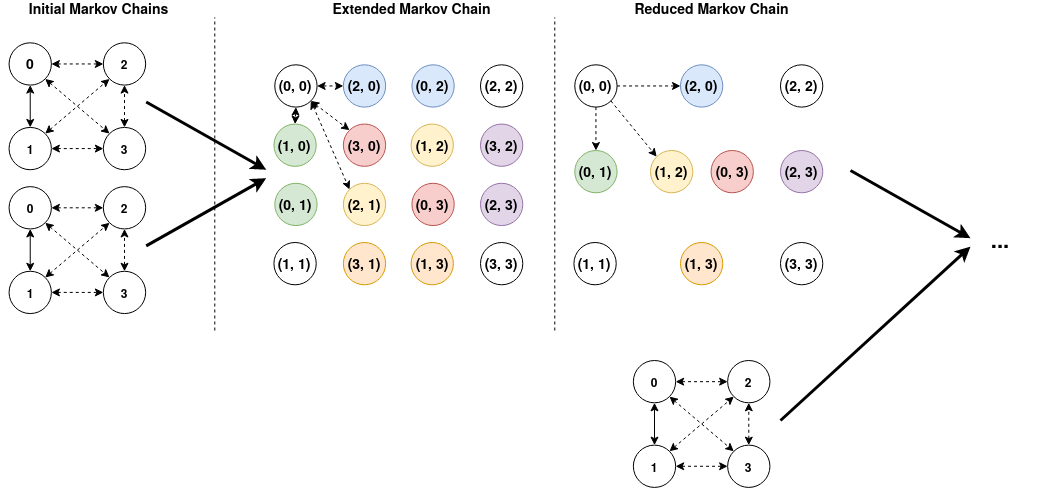

Để mô hình hóa 2 quá trình độc lập, trước tiên chúng ta mở rộng 4 trạng thái ẩn thành 16 trạng thái ẩn để nắm bắt tất cả các tổ hợp có thể có của các trạng thái ẩn. Sau đó, chúng ta nhóm các trạng thái tương tự lại với nhau (được đánh dấu cùng màu). Chúng ta có thể tiếp tục mô hình hóa 3 quy trình bằng cách mở rộng ma trận 10x10 mới thành 40x40 và giảm nó trở lại 20x20 (v.v.)



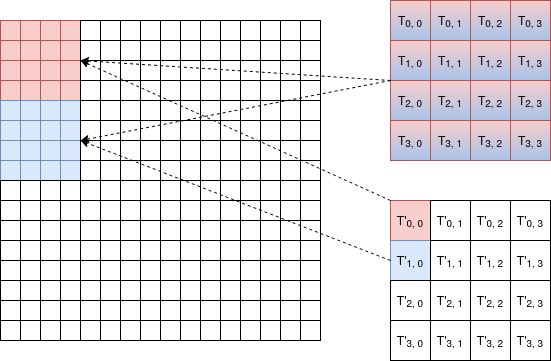

Mở rộng ma trận chuyển tiếp 4x4 để lập mô hình các quy trình độc lập.

##### code

In [ ]:
CATEGORIES = np.array([1, 1, 2, 3, 5, 4, 2, 3, 4, 5, 6, 3, 4, 6, 2, 5, 4, 5, 6, 3, 6, 6])

CATEGORY = 3

signal = np.concatenate((train['signal'].values, test['signal'].values))

ix = np.where(CATEGORIES == CATEGORY)[0]
starts = BATCHES[ix]
ends = BATCHES[ix + 1]

X = []
y = []
for start, end in zip(starts, ends):
    subsignal = signal[start*100_000:end*100_000]
    if start < 50:
        subchannels = train['open_channels'].values[start*100_000:end*100_000]
    else:
        subchannels = [-1]*((end-start)*100_000)
        
    if start == 35:
        subsignal = list(subsignal[:100000]) + list(subsignal[-100000:])
        subchannels = list(subchannels[:100000]) + list(subchannels[-100000:])
    
    X.extend(subsignal)
    y.extend(subchannels)
    
X = np.array(X)
y = np.array(y)
print(len(X), len(y))

900000 900000


Trong mỗi lần lặp, trước tiên chúng ta mở rộng ma trận chuyển tiếp của mình. Nếu ma trận chuyển tiếp ban đầu là N x N, thì ma trận mới được mở rộng của chúng ta sẽ là N * K x N * K mà ma trận này nắm bắt tất cả các tương tác có thể có của N trạng thái ban đầu với K trạng thái mới. Sau khi mở rộng, chúng ta nhóm các trạng thái tương tự lại với nhau. Ví dụ, quy trình 1 ở trạng thái ẩn 0 và quy trình 2 ở trạng thái ẩn 1 tương đương với quy trình 1 ở trạng thái ẩn 1 và quy trình 2 ở trạng thái ẩn 0.

Sau quy trình trên, ma trận mới được tạo sẽ có kích thước C x C, với C là tổ hợp lặp của P quá trình độc lập và K trạng thái ẩn. Ví dụ, với 4 trạng thái ẩn và 3 quá trình độc lập, C sẽ bằng 20 (K(4,3) = C(4+3-1,3) = 20)

In [ ]:
# Estimate the transition matrix based on the ground truth
Ptran = np.array([[0     , 0.0067, 0     , 0     ],
                  [0.0373, 0     , 0.2762, 0.0230],
                  [0     , 0.1991, 0     , 0     ],
                  [0     , 0.0050, 0     , 0     ]])
States = [1, 1, 0, 0]

def calculate_matrix(transition_matrix, states, number_processes):
    """
    Expand a transition matrix to model separate processes.
    If max(open_channels) = K, then we assume K 0/1 processes. 
    E.g. our data category 3 corresponds to a maximum
    of 3 open_channels, so 3 processes.
    
    We create model a combination_with_repetition(3, 4) = 20
    transition matrix. The first row & col corresponds to all
    processes being in the first hidden state (1, 1, 1). The
    second row & col corresponds to (1, 1, 2), and so on until
    (4, 4, 4).
    
    To calculate the transition probability from (1, 2, 2) to
    (1, 1, 3), we calculate P(1->1) * P(2->1) * P(2->3). But
    also for all permutations (e.g. (2, 1, 2) and (3, 1, 1)).
    In the end, we normalize our transition matrix.
    """
    # Fill in diagonals such that each row sums to 1
    for i in range(transition_matrix.shape[0]):
        transition_matrix[i, i] = 1 - np.sum(transition_matrix[i, :])

    n0 = len(states)
    new_transition_matrix = transition_matrix.copy()
    new_states = [(x,) for x in range(n0)]
    for process in range(1, number_processes):
        # We expand our current transition matrix (that models up to `process` number
        # of separate processes) its' dimensions by n0. We basically add another
        # possible state transition for a new process.
        nc = new_transition_matrix.shape[0]
        temp_transition_matrix = np.zeros((n0*nc, n0*nc))
        temp_states = []
        for i in range(n0):
            temp_states.extend([s + (i,) for s in new_states])
            for j in range(n0):
                # We add i -> j as our final transition
                temp_transition_matrix[i*nc:(i+1)*nc, j*nc:(j+1)*nc] = transition_matrix[i][j] * new_transition_matrix
              
        # We now group similar processes together to reduce our matrix. 
        # E.g. (1, 2, 3) is the same as (2, 3, 1)
        new_states = sorted(list(set([tuple(sorted(x)) for x in temp_states])))
        new_transition_matrix = np.zeros((len(new_states), len(new_states)))
        for i in range(len(new_states)):
            ix_i = [k for k, x in enumerate(temp_states) if tuple(sorted(x)) == new_states[i]]
            for j in range(len(new_states)):
                ix_j = [k for k, x in enumerate(temp_states) if tuple(sorted(x)) == new_states[j]]
                new_transition_matrix[i, j] = np.sum(temp_transition_matrix[ix_i, :][:, ix_j])
                new_transition_matrix[i, j] /= len(ix_i)
    
    new_channels = []
    for s in new_states:
        new_channels.append(sum([states[x] for x in s]))
    new_channels= np.array(new_channels)
        
    return new_transition_matrix, new_channels

Ptran, States = calculate_matrix(Ptran, States, 3)
print('Transition matrix shape: {}'.format(Ptran.shape))

# Estimate means and covs per unique ground truth value
means = []
covs = []
for c in sorted(np.unique(y[y >= 0])):
    means.append(np.mean(X[y == c]))
    covs.append(np.cov(X[y == c]))
    
means = [means[c] for c in States]
covs = [covs[c] for c in States]
    
# Defining our HMM
hmm = GaussianHMM(
    n_components=len(States),           # Number of hidden states
    n_iter=50,                          # Total number of iterations
    verbose=True,                       # Show logs
    algorithm='map',                    # Use maximum a posteriori instead of Viterbi
    params='stmc',                      # Optimize start probs, transmat, means, covs
    random_state=42,
    init_params='s',                    # Manually initialize all but start probabilities
    covariance_type='full',             # Separate covariance per hidden state
    tol=1                               # Convergence criterion (set high for fast execution)
)

# Initialize the parameters of our HMM
hmm.n_features = 1
hmm.means_ = np.array(means).reshape(-1 ,1)
hmm.covars_ = np.array(covs).reshape(-1, 1, 1)
hmm.transmat_ = Ptran

# Fit our HMM (this takes a while)
_ = hmm.fit(X.reshape(-1, 1), lengths=[100000]*(len(X) // 100000))

Transition matrix shape: (20, 20)


         1     -502199.0667             +nan
         2     -491013.1205      +11185.9462
         3     -490565.9567        +447.1638
         4     -490413.1135        +152.8432
         5     -490341.4765         +71.6371
         6     -490303.0476         +38.4288
         7     -490280.6460         +22.4017
         8     -490266.7502         +13.8958
         9     -490257.6699          +9.0802
        10     -490251.4517          +6.2183
        11     -490247.0024          +4.4493
        12     -490243.6836          +3.3187
        13     -490241.1089          +2.5748
        14     -490239.0364          +2.0725
        15     -490237.3106          +1.7258
        16     -490235.8289          +1.4817
        17     -490234.5234          +1.3055
        18     -490233.3503          +1.1731
        19     -490232.2842          +1.0661
        20     -490231.3117          +0.9726


In [ ]:
# Make predictions
preds = np.array(States)[hmm.predict(X.reshape(-1, 1), lengths=[100000]*(len(X) // 100000))]

# Our naive HMM
print(f1_score(y[y >= 0], preds[y >= 0], average='macro'))

0.9865290083141114


#### 2.6. Tùy chỉnh Forward-Backward (Cat3)

Tác giả đã tự triển khai thuật toán forward-backward theo cách của họ. Tác giả đã thử nhiều cách điều chỉnh khác nhau nhưng điều dẫn đến cải tiến đáng kể nhất là việc đưa vào bộ nhớ. Khi tính toán các xác suất tại bước `t` của lượt lùi, họ sử dụng các xác suất được tính toán ở bước `t` của lượt forward:
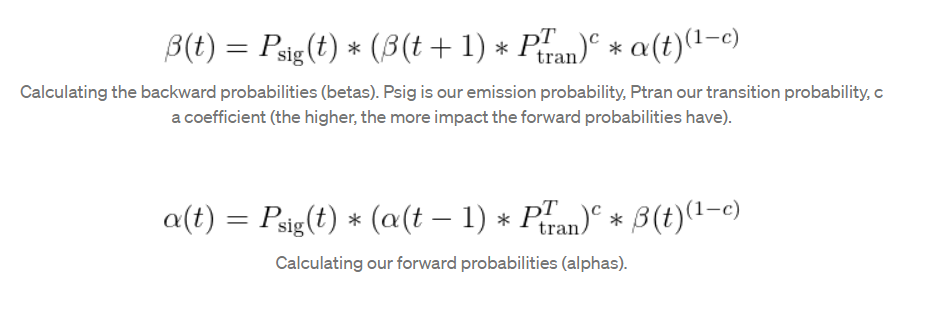


Tổng cộng tác giả thực hiện ba lần chuyển tiếp. Một lần chuyển tiếp forward, trong đó họ sử dụng các alpha trong lần chuyển tiếp backward tiếp theo và cuối cùng là một lần chuyển tiếp forward bằng cách sử dụng các giá trị betas mới được tính toán. Psig được tính như sau:
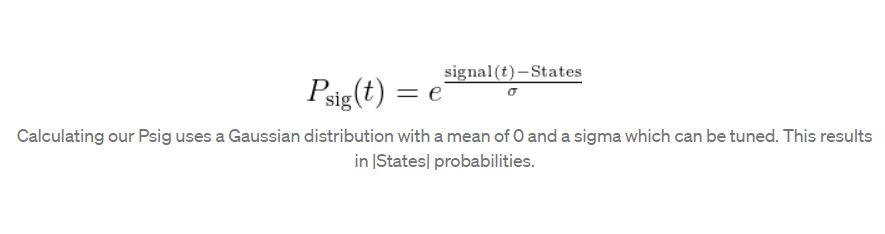

In [ ]:
# Use the result from previous notebook
train = pd.read_csv('train_2.csv')
test = pd.read_csv('test_2.csv')

In [ ]:
CATEGORIES = np.array([1, 1, 2, 3, 5, 4, 2, 3, 4, 5, 6, 3, 4, 6, 2, 5, 4, 5, 6, 3, 6, 6])
CATEGORY = 3

signal = np.concatenate((train['signal'].values, test['signal'].values))

ix = np.where(CATEGORIES == CATEGORY)[0]
starts = BATCHES[ix]
ends = BATCHES[ix + 1]

X = []
y = []
for start, end in zip(starts, ends):
    subsignal = signal[start*100_000:end*100_000]
    if start < 50:
        subchannels = train['open_channels'].values[start*100_000:end*100_000]
    else:
        subchannels = [-1]*((end-start)*100_000)
        
    if start == 35:
        subsignal = list(subsignal[:100000]) + list(subsignal[-100000:])
        subchannels = list(subchannels[:100000]) + list(subchannels[-100000:])
    
    X.extend(subsignal)
    y.extend(subchannels)
    
X = np.array(X)
y = np.array(y)
print(len(X), len(y))

900000 900000


In [ ]:
def forward(Psig, Ptran, etat_in=None, coef=1, normalize=True):
    if etat_in is None: etat_in = np.ones(Psig.shape)/Psig.shape[1]
    alpha = np.zeros(Psig.shape) # len(sig) x n_state
    etat = np.zeros(Psig.shape) # len(sig) x n_state
    C = np.zeros(Psig.shape[0]) # scale vector for each timestep
    
    etat[0] = etat_in[0]
    alpha[0] = etat_in[0]
    if normalize: 
        alpha[0] = etat_in[0]*Psig[0]
        alpha[0]/=alpha[0].sum()

    for j in range(1, Psig.shape[0]):
        etat[j] = alpha[j-1]@Ptran
        if normalize: etat[j] /= etat[j].sum()
        etat[j] = (etat[j]**coef) * ((etat_in[j])**(1-coef))
        if normalize: etat[j] /= etat[j].sum()
        alpha[j] = etat[j]  * Psig[j]
        alpha[j] /= alpha[j].sum()
    return alpha, etat

def calculate_matrix(transition_matrix, states, number_processes):
    """
    Expand a transition matrix to model separate processes.
    If max(open_channels) = K, then we assume K 0/1 processes. 
    E.g. our data category 3 corresponds to a maximum
    of 3 open_channels, so 3 processes.
    
    We create model a combination_with_repetition(3, 4) = 20
    transition matrix. The first row & col corresponds to all
    processes being in the first hidden state (1, 1, 1). The
    second row & col corresponds to (1, 1, 2), and so on until
    (4, 4, 4).
    
    To calculate the transition probability from (1, 2, 2) to
    (1, 1, 3), we calculate P(1->1) * P(2->1) * P(2->3). But
    also for all permutations (e.g. (2, 1, 2) and (3, 1, 1)).
    In the end, we normalize our transition matrix.
    """
    # Fill in diagonals such that each row sums to 1
    for i in range(transition_matrix.shape[0]):
        transition_matrix[i, i] = 1 - np.sum(transition_matrix[i, :])

    n0 = len(states)
    new_transition_matrix = transition_matrix.copy()
    new_states = [(x,) for x in range(n0)]
    for process in range(1, number_processes):
        # We expand our current transition matrix (that models up to `process` number
        # of separate processes) its' dimensions by n0. We basically add another
        # possible state transition for a new process.
        nc = new_transition_matrix.shape[0]
        temp_transition_matrix = np.zeros((n0*nc, n0*nc))
        temp_states = []
        for i in range(n0):
            temp_states.extend([s + (i,) for s in new_states])
            for j in range(n0):
                # We add i -> j as our final transition
                temp_transition_matrix[i*nc:(i+1)*nc, j*nc:(j+1)*nc] = transition_matrix[i][j] * new_transition_matrix
              
        # We now group similar processes together to reduce our matrix. 
        # E.g. (1, 2, 3) is the same as (2, 3, 1)
        new_states = sorted(list(set([tuple(sorted(x)) for x in temp_states])))
        new_transition_matrix = np.zeros((len(new_states), len(new_states)))
        for i in range(len(new_states)):
            ix_i = [k for k, x in enumerate(temp_states) if tuple(sorted(x)) == new_states[i]]
            for j in range(len(new_states)):
                ix_j = [k for k, x in enumerate(temp_states) if tuple(sorted(x)) == new_states[j]]
                new_transition_matrix[i, j] = np.sum(temp_transition_matrix[ix_i, :][:, ix_j])
                new_transition_matrix[i, j] /= len(ix_i)
    
    new_channels = []
    for s in new_states:
        new_channels.append(sum([states[x] for x in s]))
    new_channels= np.array(new_channels)
        
    return new_transition_matrix, new_channels

def get_Psig(signal, States, kexp):
    Psig = np.zeros((len(signal), len(States)))
    for i in range(len(Psig)):
        Psig[i] = np.exp((-(signal[i] - States)**2)/(kexp))
    return Psig
Ptran = np.array([[0     , 0.0067, 0     , 0     ],
                  [0.0373, 0     , 0.2762, 0.0230],
                  [0     , 0.1991, 0     , 0     ],
                  [0     , 0.0050, 0     , 0     ]])
States = [1, 1, 0, 0]

Ptran, States = calculate_matrix(Ptran, States, 3)
print('Transition matrix shape: {}'.format(Ptran.shape))

Transition matrix shape: (20, 20)


In [ ]:
# These hyper-parameters can be tuned in a supervised manner with macro-F1 (which works best
# for a competition), but also in an unsupervised manner using, for example, likelihood.
Kexp = .1307
Kexpp = 1.8
COEF_BACK = .9192
COEF_FOR = .8869
COEF_FIN = 0.50
COEF_FIN3 = 0.3

In [ ]:
preds = np.zeros(len(X))
for k in range(len(X) // 100000):
    sig = X[100000*k:100000*(k + 1)]
    nstates = Ptran.shape[0]
    Psig = get_Psig(sig, States, Kexp)
    
    alpha0, etat0 = forward(Psig, Ptran, normalize=False)
    alpha1, etat1 = forward(Psig[::-1], np.transpose(Ptran), etat_in=etat0[::-1], coef=COEF_BACK)
    alpha2, etat2 = forward(Psig, Ptran, etat_in=etat1[::-1], coef=COEF_FOR)

    alpha3 = etat1[::-1]*etat2*Psig**Kexpp
    for j, alp in enumerate(alpha3): alpha3[j] /= alp.sum()

    pred = COEF_FIN*(alpha1[::-1]) + (1-COEF_FIN-COEF_FIN3)*alpha2 + COEF_FIN3*alpha3

    preds[100000*k:100000*(k + 1)] = pred@States
    print('Max/min', (pred@States).max(), (pred@States).min())

Max/min 2.999999999928611 5.1931701959064075e-09
Max/min 2.9999999999819265 3.0652363164720976e-09
Max/min 2.9999999999406866 4.779580490915018e-09
Max/min 2.999999999926908 9.58363612829121e-09
Max/min 2.9999999999963483 2.946838569181532e-09
Max/min 2.999999999988877 1.4361266054097705e-09
Max/min 2.9999999999951856 4.4901471588728965e-10
Max/min 3.0 4.634597501936892e-09
Max/min 2.999999999993139 7.839022623776472e-09


In [ ]:
print(f1_score(y[y >= 0], np.round(preds[y >= 0]), average='macro'))

0.9868267137587179


In [ ]:
np.save('cat3_preds.npy', preds)

#### 2.7. Dự đoán hậu xử lý dữ liệu (Cat3)

Sau khi sử dụng thuật toán Forward-Backward, chúng ta nhận được một ma trận xác suất P kích thước TxK (P[T][K]) với K trạng thái ẩn tại mỗi thời điểm T. Vì ta có nhiều trạng thái ẩn mà số trạng thái ẩn tương đương với số kênh mở, nên ta cần một bước hậu xử lý những xác suất này để đưa ra dự đoán số kênh mở. Bước đầu tiên, ta lấy tích vô hướng của P[T][K] với K trạng thái. Sau đó, ta xác định các ngưỡng cho mỗi lớp và mỗi category. Để xác định các ngưỡng này, ta sử dụng một kỹ thuật không  giám sát. Đầu tiên, ta lọc ra các tín hiệu gần với giá trị làm tròn của chúng (vì không có nhiều nhiễu trong các tín hiệu này) và sử dụng các giá trị làm tròn của chúng làm nhãn. Sau đó, ta xác định phân phối của các giá trị làm tròn này và chọn các ngưỡng sao cho nó sẽ tạo ra một phân phối tương tự.

##### code

In [ ]:
# Use the result from previous notebook
train = pd.read_csv('train_2.csv')
test = pd.read_csv('test_2.csv')
preds = np.load('cat3_preds.npy')

In [ ]:
CATEGORY = 3

signal = np.concatenate((train['signal'].values, test['signal'].values))

ix = np.where(CATEGORIES == CATEGORY)[0]
starts = BATCHES[ix]
ends = BATCHES[ix + 1]

X = []
y = []
for start, end in zip(starts, ends):
    subsignal = signal[start*100_000:end*100_000]
    if start < 50:
        subchannels = train['open_channels'].values[start*100_000:end*100_000]
    else:
        subchannels = [-1]*((end-start)*100_000)
        
    if start == 35:
        subsignal = list(subsignal[:100000]) + list(subsignal[-100000:])
        subchannels = list(subchannels[:100000]) + list(subchannels[-100000:])
    
    X.extend(subsignal)
    y.extend(subchannels)
    
X = np.array(X)
y = np.array(y)
print(len(X), len(y))

900000 900000


In [ ]:
def optimize_thres_unsupervised(pred):
    """
    Unsupervised threshold optimization. We first take the "clean" data by filtering
    data points, per batch of 100K that are very close to their rounded value, 
    i.e. x - round(x) < thresh. We then calculate the the percentage that each open 
    channel value occurs int hese clean signal values. Afterwards, we determine the
    thresholds to extrapolate these percentages to the 100K batch again.
    """
    sig = X
    
    sY = 0.26
    L = 100_000
    Y = pred.copy()
    Thres = {}
    Yopt = pred.copy()
    for k in range(len(pred) // L):
        Thres[k] = np.zeros(12)
        Thres[k][0] = -99
        Thres[k][-1] = 99
        Yloc = Y[k*L:(k+1)*L]
        floc = sig[k*L:(k+1)*L]
        floc2 = floc[np.abs(floc-np.round(floc)) - sY < 0]
        
        for i in range(10):
            ni = len(floc2[np.round(floc2)<=i])
            ni2 = np.round(ni*len(floc)/ max(1, len(floc2))).astype(int)
            Ys = np.concatenate([np.sort(floc), [19]])
            Thres[k][i+1] = 0.5*(Ys[max(0,ni2)]+Ys[min(len(Ys)-1,ni2)])

        for i in range(11):
            Yloc[(Yloc>=Thres[k][i])&(Yloc<Thres[k][i+1])] = i
            
        print(Thres[k][:5])
        Yopt[k*L:(k+1)*L] = Yloc
    
    return Yopt

In [ ]:
Yopt = optimize_thres_unsupervised(preds)

[-99.           0.41273885   1.48466223   2.51293105   3.73028952]
[-99.           0.41048571   1.45984984   2.50404247   3.736513  ]
[-99.           0.44892023   1.45582944   2.51335678   3.70888588]
[-99.           0.44807173   1.47087873   2.50854869   3.72548514]
[-99.           0.40643814   1.4579393    2.51803739   3.7210313 ]
[-99.           0.41168354   1.46567638   2.50595482   3.7149613 ]
[-99.           0.42150633   1.46446251   2.50963728   3.7342346 ]
[-99.           0.40890002   1.4656657    2.49255328   3.73043152]
[-99.           0.41637827   1.45550587   2.49653989   3.72100869]


In [ ]:
print(f1_score(y[y >= 0], Yopt[y>=0].astype(int), average='macro'))

0.9868946406865468


## Nhìn lại quá trình làm đồ án

#### Thảo:
> Khó khăn: Kiến thức về học máy còn hạn chế nên khi lựa chọn cuộc thi khá là khó. Cho nên mất thời gian và khi chọn cũng không biết liệu có làm được hay không. Và nó khiến nản mỗi khi nhìn.
> Sau đồ án mình cũng đã biết thêm về các ứng dụng của HMM. Về ý nghĩa các loại độ đo và khi nào thì sử dụng nó.
> Nếu có thời gian hơn thì sẽ phân tích dữ liệu kĩ hơn. Và tìm giải pháp ở thứ nhất trên private leaderboard. Vì ở trên public chỉ đứng thứ 15. Nó sẽ thú vị và học được nhiều thứ hơn.

#### Thanh
> Khó khăn: 
+ Thời gian đầu khá khó khăn để lựa chọn được cuộc thi phù hợp.
+ Khó khăn khi tìm hiểu mô hình Markov ẩn

> Học được: 
+ Biết cách tải dữ liệu trực tiếp từ Google Drive lên Colab
+ Biết thêm kiến thức về kênh ion và các thông tin liên quan
+ Cải thiện khả năng đọc hiểu tài liệu tiếng Anh

#### Thành
> Khó khăn: 
+ Khó để lựa chọn cuộc thi phù hợp 
+ Quá trình tìm hiểu mô hình Markov ẩn còn gặp nhiều khó khăn chưa giải quyết được
+ Cách tác giả sử dụng còn mơ hồ khó hiểu.
+ Tài liệu về mô hình và cách hoạt động đa phần đều là tiếng Anh

> Học được: 
+ Một phần kiến thức về mô hình Markov
+ Cải thiện khả năng đọc hiểu tiếng Anh
+ Biết thêm về cách hoạt động cũng như tác dụng việc đóng mở kênh ion

#### Nhóm
Nếu có thời gian hơn thì nhóm sẽ phân tích dữ liệu kĩ hơn, tìm hiểu rõ hơn về cuộc thi

## Tài liệu tham khảo

Để hoàn thành đồ án này, nhóm bạn đã tham khảo những tài liệu nào?
- https://towardsdatascience.com/identifying-the-number-of-open-ion-channels-with-hidden-markov-models-334fab86fc85#cf75
- https://github.com/GillesVandewiele/Liverpool-Ion-Switching
- https://en.wikipedia.org/wiki/Ion_channel